In [1]:
import os
os.chdir('C:/Users/acorn/Desktop')

In [93]:
import pandas as pd 
credit = pd.read_csv('credit.csv')

In [412]:
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import re
warnings.filterwarnings('ignore')
import time


from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate,cross_val_score,RandomizedSearchCV,StratifiedKFold,ShuffleSplit,KFold,LeaveOneOut
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform, randint
import lightgbm as lgb
import xgboost as xgb
from sklearn.svm import SVC,NuSVC,LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegressionCV,PassiveAggressiveClassifier,RidgeClassifierCV,SGDClassifier,Perceptron
from sklearn.naive_bayes import BernoulliNB
from sklearn.gaussian_process.kernels import RBF

In [4]:
credit.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount($),Length of current employment(Month),Sex & Marital Status,Duration in Current address,Most valuable available asset,Age (years),Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.54500,2.828000,3271.24800,3.384000,2.68200,2.845000,2.358000,35.54200,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,0.835589,12.058814,1.08312,2.744439,2822.75176,1.208306,0.70808,1.103718,1.050209,11.35267,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.00000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,3.000000,2.00000,2.000000,1.000000,27.00000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,3.000000,3.00000,3.000000,2.000000,33.00000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,4.00000,3.000000,3972.25000,5.000000,3.00000,4.000000,3.000000,42.00000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,4.00000,4.000000,4.000000,75.00000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [406]:
model = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    xgb.XGBClassifier(random_state = 42),
    lgb.LGBMClassifier(random_state=42),
    ExtraTreeClassifier(random_state=42),
    SVC(),
    MLPClassifier(random_state=42, shuffle=False),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    AdaBoostClassifier(random_state=42),
    BaggingClassifier(random_state=42),
    GaussianProcessClassifier(),
    LogisticRegressionCV(random_state=42),
    PassiveAggressiveClassifier(random_state=42),
    # RidgeClassifierCV(),
    SGDClassifier(random_state=42),
    Perceptron(random_state=42),
    BernoulliNB(),
    NuSVC(random_state=42,probability=True),
    LinearSVC(random_state=42)
]


LR_param = {'C': [0.1, 1, 10], 'penalty':['l2'], 'solver' : ['liblinear'], 'max_iter':[30000], 'class_weight':['balanced']}
RF_param = {'n_estimators': [10, 50, 100],'max_depth': [3, 5, 10],}
GB_param = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
XGB_param = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1],'max_depth':[6],'min_child_weight':[1], 'subsample':[0.8],
             'gamma': [0],'objective':['binary:logistic'],'booster':['gbtree']}
LGBM_param = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1],'force_row_wise':[True], 'min_data_in_leaf':[3]}
Tree_param = {'max_depth': [3, 5,10],'max_features' : [2, 0.5, 'sqrt', 'log2', None], 'min_impurity_decrease':[0.0, 0.01, 0.05, 0.1],
              'min_samples_split':[1,3,5], 'min_samples_leaf':[1,3,5],'max_leaf_nodes':[1,3,5,10]}
KNN_param = {'n_neighbors': [3, 5, 10], 'algorithm' : ['ball_tree']}
NB_param = {'var_smoothing': [1e-9, 1e-8, 1e-7]}
SVC_param = {'kernel':['rbf'], 'C' : [1], 'shrinking' : [False], 'probability' : [True], 'max_iter' : [30000], 'class_weight' : [None]}
MPL_param = {'hidden_layer_sizes':[300,150,100,50,25,5], 'max_iter':[1000000],'solver':['adam'], 'alpha':[0.0001], 'learning_rate':['constant']}
LDA_param = {'solver':['lsqr']}
QDA_param = { 'reg_param':[0.1]}
AdaB_param = {'n_estimators':[50],       # 사용할 약한 학습기의 개수
                'learning_rate':[1.0],     # 학습 속도
                'algorithm':['SAMME.R']}   # 'SAMME' 또는 'SAMME.R' 알고리즘 
Bagg_param = {
    # 'base_estimator':[DecisionTreeClassifier()], # 기본 학습기
    'n_estimators':[10],        # 기본 학습기의 개수
    'max_samples':[1.0],        # 각 기본 학습기가 훈련에 사용할 샘플 비율
    'max_features':[1.0],       # 각 기본 학습기가 훈련에 사용할 특성 비율
    'bootstrap':[True]}         # 부트스트래핑 여부

GPC_param = {'kernel':[RBF()]}
LRCV_param = {'Cs':[10],                  # 시도할 C 값의 개수
    'cv':[10],                   # 교차 검증 폴드 수
    'penalty':['l2'],            # 패널티 종류 ('l1', 'l2' 가능)
    'solver':['lbfgs'],          # 최적화 알고리즘
    'max_iter':[100]   }
PAC_param = {'C':[1.0],                  # 규제 강도 (C가 클수록 규제가 약해짐)
    'max_iter':[1000],           # 최대 반복 횟수
    'tol':[1e-3]}     # 허용 오차}
Ridge_param = {'alphas':[0.1, 1.0, 10.0], # 시도할 alpha 값의 리스트
    'cv':[5]}
SGD_param = {'loss':['hinge'],             # 손실 함수 ('hinge' for SVM, 'log' for logistic regression)
    'penalty':['l2'],             # 규제 ('l2', 'l1', 'elasticnet' 가능)
    'max_iter':[1000],            # 최대 반복 횟수
    'tol':[1e-3]}
Perceptron_param = {'max_iter':[1000],            # 최대 반복 횟수
    'tol':[1e-3],                 # 허용 오차
    'penalty':[None]}             # 규제 ('l2', 'l1', 'elasticnet' 가능)}
BernoulliNB_param = {'alpha':[1.0],                # 라플라스 스무딩 파라미터
    'binarize':[0.0]}              # 이진화 임계값}
NuSVC_param = {'nu':[0.5],                  # 규제 파라미터 (0과 1 사이)
    'kernel':['rbf']}            # 커널 종류 ('linear', 'poly', 'rbf', 'sigmoid' 가능)}
LiSVC_param = {'C':[1.0],                   # 규제 강도
    'max_iter':[1000],            # 최대 반복 횟수
    'tol':[1e-3]     }

param = [LR_param,Tree_param,RF_param,GB_param,KNN_param,NB_param,XGB_param,LGBM_param,Tree_param,SVC_param,MPL_param,LDA_param,QDA_param,
         AdaB_param,Bagg_param,GPC_param,LRCV_param,PAC_param,SGD_param,Perceptron_param,BernoulliNB_param,NuSVC_param,LiSVC_param]

In [430]:
train_score = []
val_score = []
test_score = []
representative_score = []

X = credit.drop('Creditability', axis=1, inplace=False)
y = credit.Creditability

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=0.625, random_state=42)

def ML(model, param_grid):

    # Grid search function
    def Grid_set_(model, param_grid):
        start_time = time.time()  # 시작 시간 기록
        grid_search = GridSearchCV(model, param_grid, cv=KFold(n_splits=10), scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        end_time = time.time()  # 끝 시간 기록
        grid_search_time = (end_time - start_time) * 1000  # 밀리초로 변환
        print(f"Grid Search Time: {grid_search_time:.2f} milliseconds")
        
        best_model = grid_search.best_estimator_

        cv_scores = cross_val_score(best_model, X_train, y_train, cv=KFold(n_splits=10), scoring='accuracy')
        print(f"***** {model.__class__.__name__} *****")
        print(f"Cross-validation accuracy (Training): {cv_scores.mean():.2f}")
        print(f'Grid Search Best Score : {grid_search.best_score_:.2f}')
        return best_model, grid_search, cv_scores
    

    # Evaluate model (common for train, val, test)
    def evaluate_model(best_model, X, y):
        y_pred = best_model.predict(X)

        if hasattr(best_model, "predict_proba"):
            y_prob = best_model.predict_proba(X)[:, 1]
        elif hasattr(best_model, "decision_function"):
            y_prob = best_model.decision_function(X)
        else:
            raise ValueError("Model does not support probability or decision function.")

        fpr, tpr, _ = roc_curve(y, y_prob, pos_label=1)
        roc_auc = auc(fpr, tpr)

        precision, recall, _ = precision_recall_curve(y, y_prob, pos_label=1)
        pr_auc = auc(recall, precision)

        F1 = f1_score(y, y_pred)
        accuracy = accuracy_score(y, y_pred)

        report = classification_report(y, y_pred, output_dict=True)

        return fpr, tpr, roc_auc, precision, recall, pr_auc, F1, accuracy, report



    # Train data evaluation
    def Train_set(best_model, X_train, y_train):
        start_time = time.time()  # 시작 시간 기록
        results = evaluate_model(best_model, X_train, y_train)
        end_time = time.time()  # 끝 시간 기록
        train_time = (end_time - start_time) * 1000  # 밀리초로 변환
        print(f"Training Time: {train_time:.2f} milliseconds")
        return results

    # Validation data evaluation
    def Validation_set(best_model, X_val, y_val):
        start_time = time.time()  # 시작 시간 기록
        results = evaluate_model(best_model, X_val, y_val)
        end_time = time.time()  # 끝 시간 기록
        validation_time = (end_time - start_time) * 1000  # 밀리초로 변환
        print(f"Validation Time: {validation_time:.2f} milliseconds")
        return results

    # Test data evaluation
    def Test_set(best_model, X_test, y_test):
        start_time = time.time()  # 시작 시간 기록
        results = evaluate_model(best_model, X_test, y_test)
        end_time = time.time()  # 끝 시간 기록
        test_time = (end_time - start_time) * 1000  # 밀리초로 변환
        print(f"Test Time: {test_time:.2f} milliseconds")
        return results

    # Bar graph data
    def Bar_Source():
        train_stats = [{
            'ROC_AUC_train': roc_auc_train,
            'PR_AUC_train': pr_auc_train,
            'Recall_train': recall_train.mean(),
            'Precision_train': precision_train.mean(),
            'F1-score_train': F1_train,
            'Model': model.__class__.__name__,
            'Accuracy_train': accuracy_train
        }]
        train_score.append(train_stats)

        val_stats = [{
            'ROC_AUC_val': roc_auc_val,
            'PR_AUC_val': pr_auc_val,
            'Recall_val': recall_val.mean(),
            'Precision_val': precision_val.mean(),
            'F1-score_val': F1_val,
            'Model': model.__class__.__name__,
            'Accuracy_val': accuracy_val
        }]
        val_score.append(val_stats)

        test_stats = [{
            'ROC_AUC_test': roc_auc_test,
            'PR_AUC_test': pr_auc_test,
            'Recall_test': recall_test.mean(),
            'Precision_test': precision_test.mean(),
            'F1-score_test': F1_test,
            'Model': model.__class__.__name__,
            'Accuracy_test': accuracy_test
        }]
        test_score.append(test_stats)

        representative_stats = [{
            'CV_score': cv_scores.mean(),
            'Best_score': grid_search.best_score_,
            'Model': model.__class__.__name__
        }]
        representative_score.append(representative_stats)

    # Final results
    def Result_():
        results = {
            'Training': {
                'classification_report': report_train,
                'roc_auc': roc_auc_train,
                'pr_auc': pr_auc_train,
                'recall': recall_train.mean(),
                'precision': precision_train.mean(),
                'F1-Score': F1_train,
                'fpr': fpr_train,
                'tpr': tpr_train,
                'accuracy': accuracy_train
            },
            'Validation': {
                'classification_report': report_val,
                'roc_auc': roc_auc_val,
                'pr_auc': pr_auc_val,
                'recall': recall_val.mean(),
                'precision': precision_val.mean(),
                'F1-Score': F1_val,
                'fpr': fpr_val,
                'tpr': tpr_val,
                'accuracy': accuracy_val
            },
            'Test': {
                'classification_report': report_test,
                'roc_auc': roc_auc_test,
                'pr_auc': pr_auc_test,
                'recall': recall_test.mean(),
                'precision': precision_test.mean(),
                'F1-Score': F1_test,
                'fpr': fpr_test,
                'tpr': tpr_test,
                'accuracy': accuracy_test
            }
        }
        return results

    # Visualization & Output
    def output(results):
        for stage, result in results.items():
            plt.figure(figsize=(5, 5))
            plt.plot(result['fpr'], result['tpr'], label=f'ROC curve (area = {result["roc_auc"]:.2f})', color='r')
            plt.fill_between(result['fpr'], result['tpr'], color='r', alpha=0.2)
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {stage} Data')
            plt.legend(loc='lower right')
            plt.grid(True)
            plt.show()

            print(f'*****{model.__class__.__name__}*****')
            print(f"Stage: {stage}")
            print("Classification Report:")
            print(pd.DataFrame(result['classification_report']).transpose())
            print(f"\nPrecision_mean: {result['precision']:.2f}")
            print(f"\nRecall_mean: {result['recall']:.2f}")
            print(f"\nF1-Score: {result['F1-Score']:.2f}")
            print(f"\nROC_AUC: {result['roc_auc']:.2f}")
            print(f"\nPR_intercept_Area: {result['pr_auc']:.2f}")
            print(f"\nAccuracy: {result['accuracy']:.2f}")
            print('\n')

    best_model, grid_search, cv_scores = Grid_set_(model, param_grid)

    # Run evaluations for Train, Validation, Test sets
    fpr_train, tpr_train, roc_auc_train, precision_train, recall_train, pr_auc_train, F1_train, accuracy_train, report_train = Train_set(best_model, X_train, y_train)
    fpr_val, tpr_val, roc_auc_val, precision_val, recall_val, pr_auc_val, F1_val, accuracy_val, report_val = Validation_set(best_model, X_val, y_val)
    fpr_test, tpr_test, roc_auc_test, precision_test, recall_test, pr_auc_test, F1_test, accuracy_test, report_test = Test_set(best_model, X_test, y_test)

    # Bar graph source update
    Bar_Source()

    # Results output
    results = Result_()
    output(results)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Grid Search Time: 40.65 milliseconds
***** LogisticRegression *****
Cross-validation accuracy (Training): 0.70
Grid Search Best Score : 0.70
Training Time: 3.99 milliseconds
Validation Time: 4.80 milliseconds
Test Time: 0.00 milliseconds


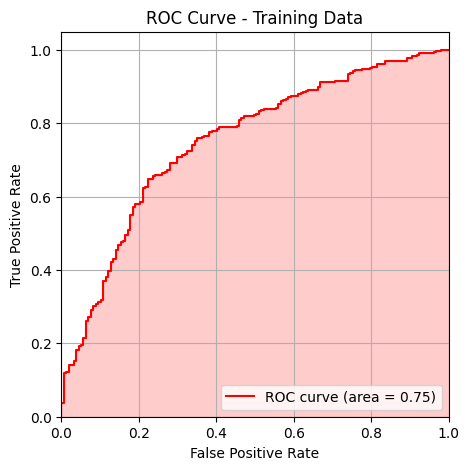

*****LogisticRegression*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.527363  0.675159  0.592179  157.000
1              0.829431  0.723032  0.772586  343.000
accuracy       0.708000  0.708000  0.708000    0.708
macro avg      0.678397  0.699096  0.682382  500.000
weighted avg   0.734582  0.708000  0.715938  500.000

Precision_mean: 0.84

Recall_mean: 0.58

F1-Score: 0.77

ROC_AUC: 0.75

PR_intercept_Area: 0.86

Accuracy: 0.71




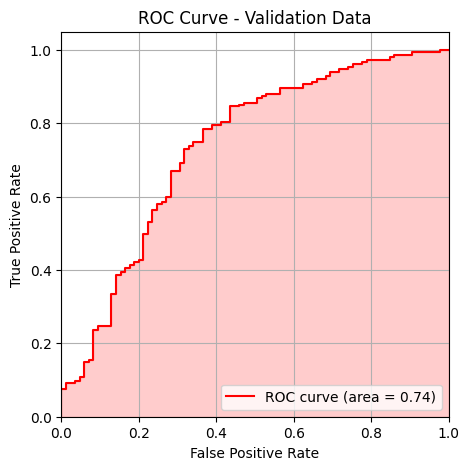

*****LogisticRegression*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.509434  0.635294  0.565445   85.000000
1              0.840206  0.758140  0.797066  215.000000
accuracy       0.723333  0.723333  0.723333    0.723333
macro avg      0.674820  0.696717  0.681256  300.000000
weighted avg   0.746487  0.723333  0.731440  300.000000

Precision_mean: 0.84

Recall_mean: 0.57

F1-Score: 0.80

ROC_AUC: 0.74

PR_intercept_Area: 0.85

Accuracy: 0.72




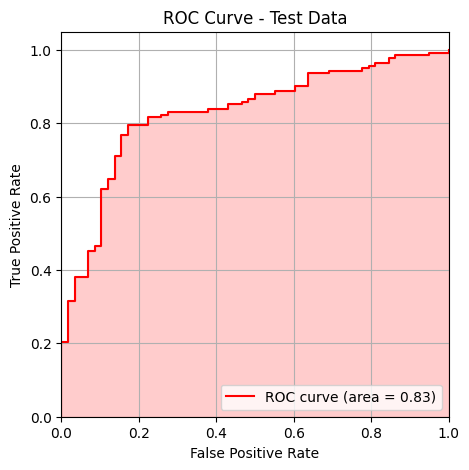

*****LogisticRegression*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.618421  0.810345  0.701493     58.0
1              0.911290  0.795775  0.849624    142.0
accuracy       0.800000  0.800000  0.800000      0.8
macro avg      0.764856  0.803060  0.775558    200.0
weighted avg   0.826358  0.800000  0.806666    200.0

Precision_mean: 0.89

Recall_mean: 0.59

F1-Score: 0.85

ROC_AUC: 0.83

PR_intercept_Area: 0.92

Accuracy: 0.80


Fitting 10 folds for each of 2160 candidates, totalling 21600 fits
Grid Search Time: 4329.15 milliseconds
***** DecisionTreeClassifier *****
Cross-validation accuracy (Training): 0.75
Grid Search Best Score : 0.75
Training Time: 0.00 milliseconds
Validation Time: 14.73 milliseconds
Test Time: 0.00 milliseconds


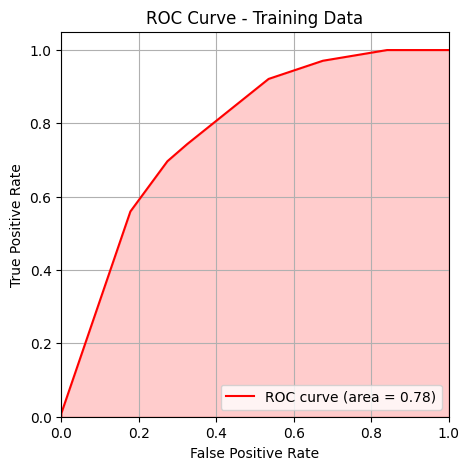

*****DecisionTreeClassifier*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0               0.73000  0.464968  0.568093  157.000
1               0.79000  0.921283  0.850606  343.000
accuracy        0.77800  0.778000  0.778000    0.778
macro avg       0.76000  0.693125  0.709350  500.000
weighted avg    0.77116  0.778000  0.761897  500.000

Precision_mean: 0.83

Recall_mean: 0.66

F1-Score: 0.85

ROC_AUC: 0.78

PR_intercept_Area: 0.89

Accuracy: 0.78




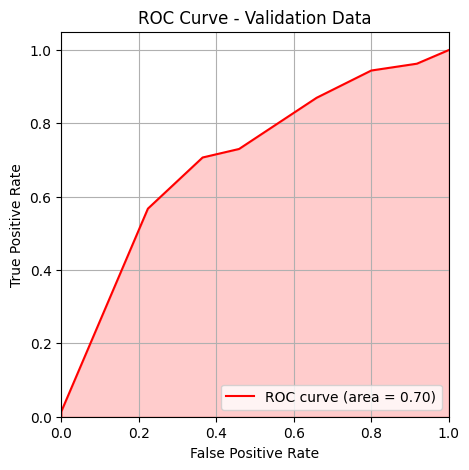

*****DecisionTreeClassifier*****
Stage: Validation
Classification Report:
              precision    recall  f1-score  support
0              0.508772  0.341176  0.408451    85.00
1              0.769547  0.869767  0.816594   215.00
accuracy       0.720000  0.720000  0.720000     0.72
macro avg      0.639160  0.605472  0.612522   300.00
weighted avg   0.695661  0.720000  0.700953   300.00

Precision_mean: 0.83

Recall_mean: 0.64

F1-Score: 0.82

ROC_AUC: 0.70

PR_intercept_Area: 0.87

Accuracy: 0.72




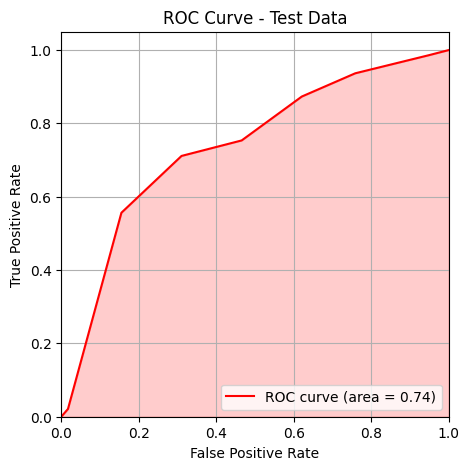

*****DecisionTreeClassifier*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0               0.55000  0.379310  0.448980    58.00
1               0.77500  0.873239  0.821192   142.00
accuracy        0.73000  0.730000  0.730000     0.73
macro avg       0.66250  0.626275  0.635086   200.00
weighted avg    0.70975  0.730000  0.713250   200.00

Precision_mean: 0.81

Recall_mean: 0.65

F1-Score: 0.82

ROC_AUC: 0.74

PR_intercept_Area: 0.82

Accuracy: 0.73


Fitting 10 folds for each of 9 candidates, totalling 90 fits
Grid Search Time: 546.57 milliseconds
***** RandomForestClassifier *****
Cross-validation accuracy (Training): 0.74
Grid Search Best Score : 0.74
Training Time: 15.62 milliseconds
Validation Time: 6.43 milliseconds
Test Time: 0.00 milliseconds


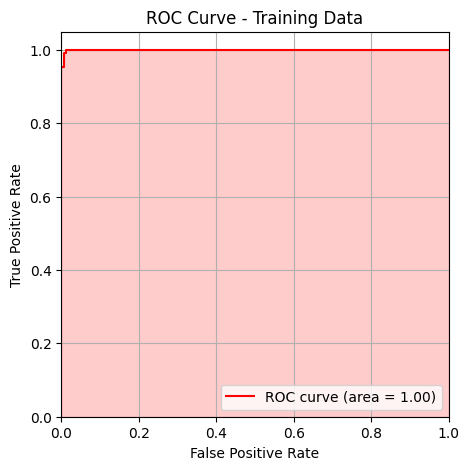

*****RandomForestClassifier*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              1.000000  0.949045  0.973856  157.000
1              0.977208  1.000000  0.988473  343.000
accuracy       0.984000  0.984000  0.984000    0.984
macro avg      0.988604  0.974522  0.981164  500.000
weighted avg   0.984365  0.984000  0.983883  500.000

Precision_mean: 0.94

Recall_mean: 0.66

F1-Score: 0.99

ROC_AUC: 1.00

PR_intercept_Area: 1.00

Accuracy: 0.98




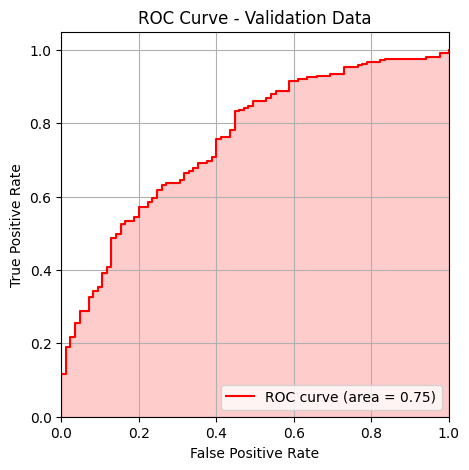

*****RandomForestClassifier*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.645833  0.364706  0.466165   85.000000
1              0.785714  0.920930  0.847966  215.000000
accuracy       0.763333  0.763333  0.763333    0.763333
macro avg      0.715774  0.642818  0.657066  300.000000
weighted avg   0.746081  0.763333  0.739789  300.000000

Precision_mean: 0.86

Recall_mean: 0.57

F1-Score: 0.85

ROC_AUC: 0.75

PR_intercept_Area: 0.88

Accuracy: 0.76




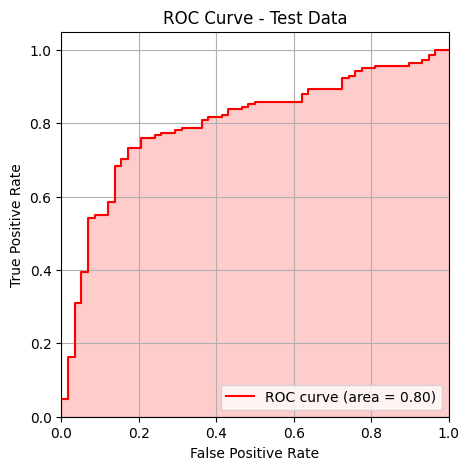

*****RandomForestClassifier*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.583333  0.362069  0.446809    58.00
1              0.774390  0.894366  0.830065   142.00
accuracy       0.740000  0.740000  0.740000     0.74
macro avg      0.678862  0.628218  0.638437   200.00
weighted avg   0.718984  0.740000  0.718921   200.00

Precision_mean: 0.88

Recall_mean: 0.59

F1-Score: 0.83

ROC_AUC: 0.80

PR_intercept_Area: 0.90

Accuracy: 0.74


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Grid Search Time: 784.89 milliseconds
***** GradientBoostingClassifier *****
Cross-validation accuracy (Training): 0.74
Grid Search Best Score : 0.74
Training Time: 5.25 milliseconds
Validation Time: 0.00 milliseconds
Test Time: 0.00 milliseconds


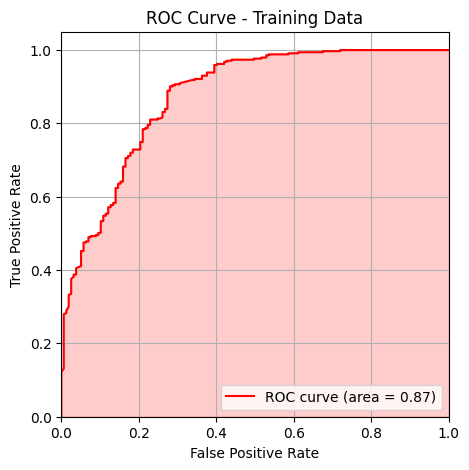

*****GradientBoostingClassifier*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.913580  0.471338  0.621849   157.00
1              0.801909  0.979592  0.881890   343.00
accuracy       0.820000  0.820000  0.820000     0.82
macro avg      0.857745  0.725465  0.751869   500.00
weighted avg   0.836974  0.820000  0.800237   500.00

Precision_mean: 0.89

Recall_mean: 0.64

F1-Score: 0.88

ROC_AUC: 0.87

PR_intercept_Area: 0.93

Accuracy: 0.82




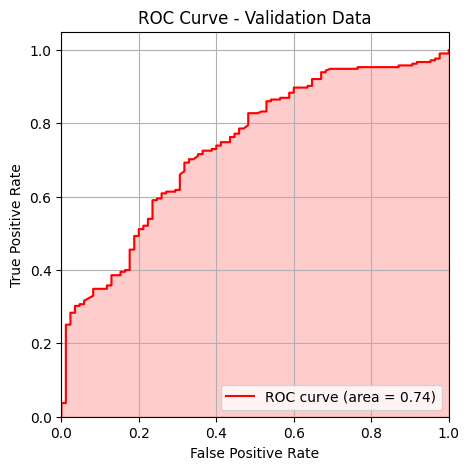

*****GradientBoostingClassifier*****
Stage: Validation
Classification Report:
              precision    recall  f1-score  support
0              0.651163  0.329412  0.437500    85.00
1              0.778210  0.930233  0.847458   215.00
accuracy       0.760000  0.760000  0.760000     0.76
macro avg      0.714686  0.629822  0.642479   300.00
weighted avg   0.742213  0.760000  0.731303   300.00

Precision_mean: 0.85

Recall_mean: 0.58

F1-Score: 0.85

ROC_AUC: 0.74

PR_intercept_Area: 0.87

Accuracy: 0.76




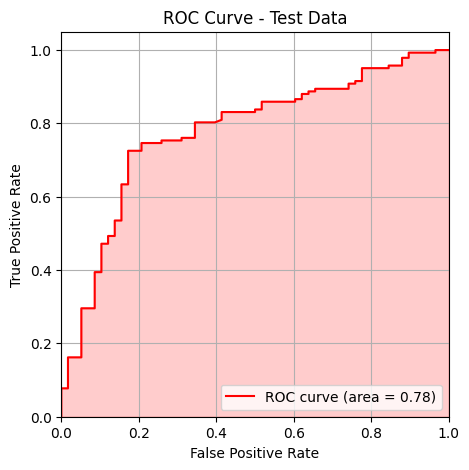

*****GradientBoostingClassifier*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.500000  0.258621  0.340909    58.00
1              0.747059  0.894366  0.814103   142.00
accuracy       0.710000  0.710000  0.710000     0.71
macro avg      0.623529  0.576493  0.577506   200.00
weighted avg   0.675412  0.710000  0.676876   200.00

Precision_mean: 0.86

Recall_mean: 0.59

F1-Score: 0.81

ROC_AUC: 0.78

PR_intercept_Area: 0.89

Accuracy: 0.71


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Grid Search Time: 46.92 milliseconds
***** KNeighborsClassifier *****
Cross-validation accuracy (Training): 0.63
Grid Search Best Score : 0.63
Training Time: 26.21 milliseconds
Validation Time: 12.51 milliseconds
Test Time: 15.56 milliseconds


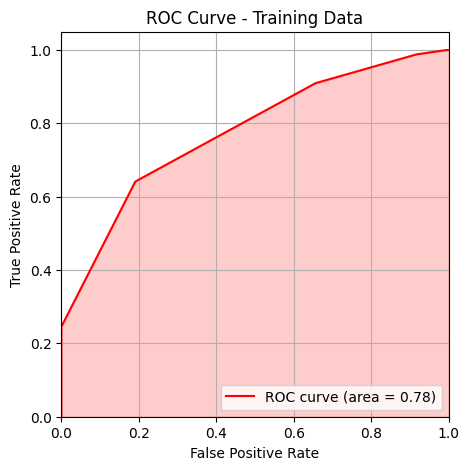

*****KNeighborsClassifier*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.635294  0.343949  0.446281  157.000
1              0.751807  0.909621  0.823219  343.000
accuracy       0.732000  0.732000  0.732000    0.732
macro avg      0.693551  0.626785  0.634750  500.000
weighted avg   0.715222  0.732000  0.704860  500.000

Precision_mean: 0.82

Recall_mean: 0.68

F1-Score: 0.82

ROC_AUC: 0.78

PR_intercept_Area: 0.90

Accuracy: 0.73




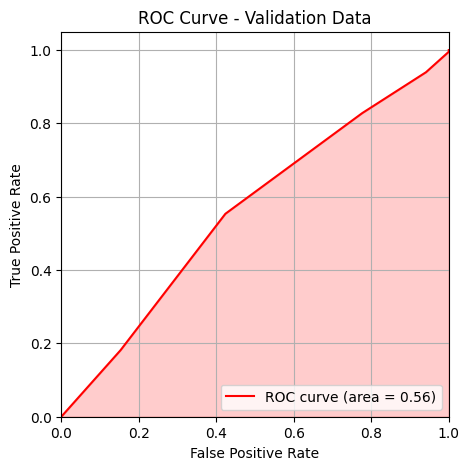

*****KNeighborsClassifier*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.339286  0.223529  0.269504   85.000000
1              0.729508  0.827907  0.775599  215.000000
accuracy       0.656667  0.656667  0.656667    0.656667
macro avg      0.534397  0.525718  0.522551  300.000000
weighted avg   0.618945  0.656667  0.632205  300.000000

Precision_mean: 0.77

Recall_mean: 0.64

F1-Score: 0.78

ROC_AUC: 0.56

PR_intercept_Area: 0.77

Accuracy: 0.66




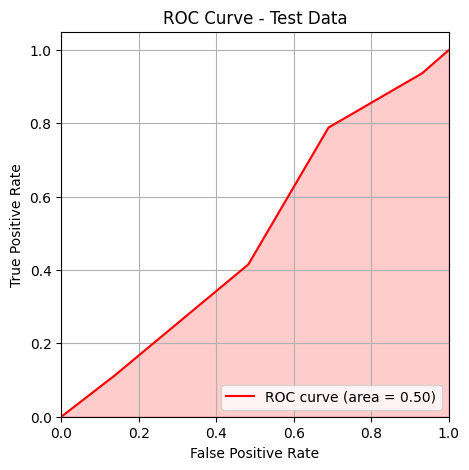

*****KNeighborsClassifier*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.375000  0.310345  0.339623    58.00
1              0.736842  0.788732  0.761905   142.00
accuracy       0.650000  0.650000  0.650000     0.65
macro avg      0.555921  0.549539  0.550764   200.00
weighted avg   0.631908  0.650000  0.639443   200.00

Precision_mean: 0.75

Recall_mean: 0.54

F1-Score: 0.76

ROC_AUC: 0.50

PR_intercept_Area: 0.71

Accuracy: 0.65


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Grid Search Time: 40.08 milliseconds
***** GaussianNB *****
Cross-validation accuracy (Training): 0.71
Grid Search Best Score : 0.71
Training Time: 0.00 milliseconds
Validation Time: 18.21 milliseconds
Test Time: 3.98 milliseconds


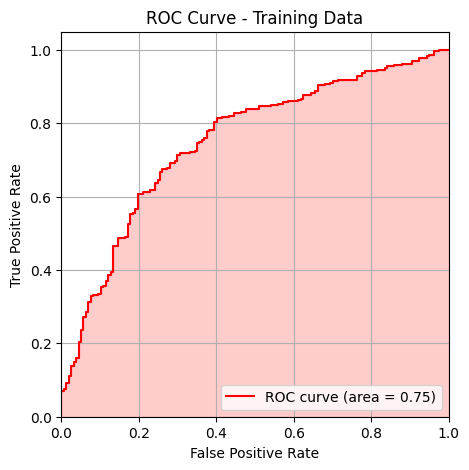

*****GaussianNB*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.581967  0.452229  0.508961  157.000
1              0.772487  0.851312  0.809986  343.000
accuracy       0.726000  0.726000  0.726000    0.726
macro avg      0.677227  0.651771  0.659473  500.000
weighted avg   0.712664  0.726000  0.715464  500.000

Precision_mean: 0.84

Recall_mean: 0.58

F1-Score: 0.81

ROC_AUC: 0.75

PR_intercept_Area: 0.86

Accuracy: 0.73




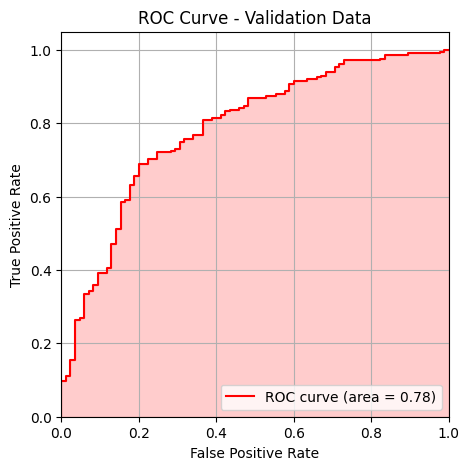

*****GaussianNB*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.625000  0.411765  0.496454   85.000000
1              0.795082  0.902326  0.845316  215.000000
accuracy       0.763333  0.763333  0.763333    0.763333
macro avg      0.710041  0.657045  0.670885  300.000000
weighted avg   0.746892  0.763333  0.746472  300.000000

Precision_mean: 0.87

Recall_mean: 0.58

F1-Score: 0.85

ROC_AUC: 0.78

PR_intercept_Area: 0.89

Accuracy: 0.76




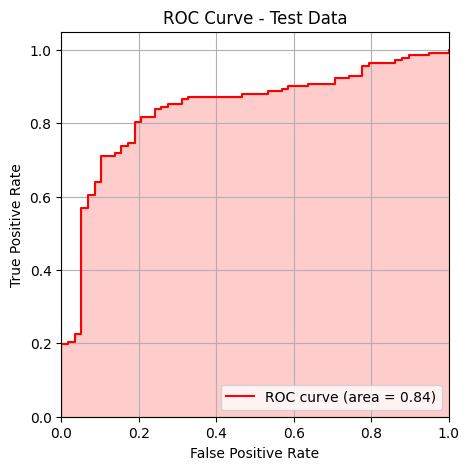

*****GaussianNB*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.666667  0.620690  0.642857     58.0
1              0.849315  0.873239  0.861111    142.0
accuracy       0.800000  0.800000  0.800000      0.8
macro avg      0.757991  0.746965  0.751984    200.0
weighted avg   0.796347  0.800000  0.797817    200.0

Precision_mean: 0.90

Recall_mean: 0.60

F1-Score: 0.86

ROC_AUC: 0.84

PR_intercept_Area: 0.93

Accuracy: 0.80


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Grid Search Time: 299.67 milliseconds
***** XGBClassifier *****
Cross-validation accuracy (Training): 0.74
Grid Search Best Score : 0.74
Training Time: 15.62 milliseconds
Validation Time: 15.62 milliseconds
Test Time: 15.62 milliseconds


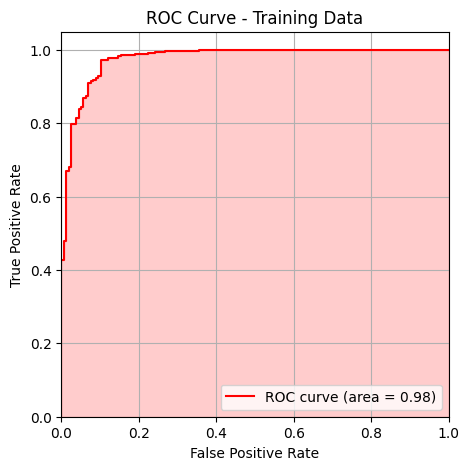

*****XGBClassifier*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              1.000000  0.643312  0.782946  157.000
1              0.859649  1.000000  0.924528  343.000
accuracy       0.888000  0.888000  0.888000    0.888
macro avg      0.929825  0.821656  0.853737  500.000
weighted avg   0.903719  0.888000  0.880071  500.000

Precision_mean: 0.94

Recall_mean: 0.65

F1-Score: 0.92

ROC_AUC: 0.98

PR_intercept_Area: 0.99

Accuracy: 0.89




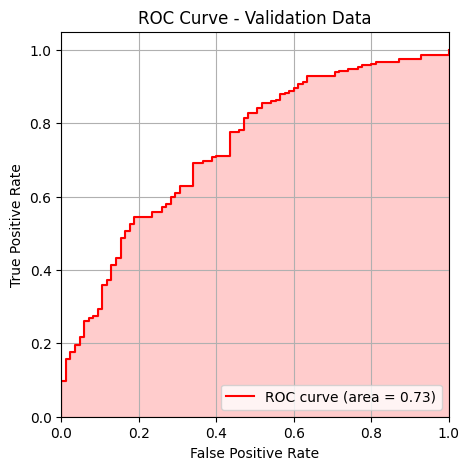

*****XGBClassifier*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.659091  0.341176  0.449612   85.000000
1              0.781250  0.930233  0.849257  215.000000
accuracy       0.763333  0.763333  0.763333    0.763333
macro avg      0.720170  0.635705  0.649435  300.000000
weighted avg   0.746638  0.763333  0.736024  300.000000

Precision_mean: 0.85

Recall_mean: 0.57

F1-Score: 0.85

ROC_AUC: 0.73

PR_intercept_Area: 0.87

Accuracy: 0.76




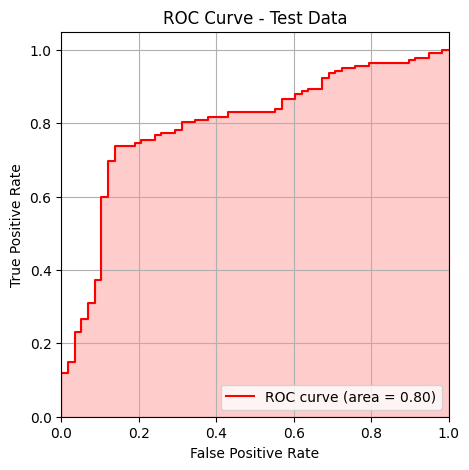

*****XGBClassifier*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.583333  0.362069  0.446809    58.00
1              0.774390  0.894366  0.830065   142.00
accuracy       0.740000  0.740000  0.740000     0.74
macro avg      0.678862  0.628218  0.638437   200.00
weighted avg   0.718984  0.740000  0.718921   200.00

Precision_mean: 0.88

Recall_mean: 0.59

F1-Score: 0.83

ROC_AUC: 0.80

PR_intercept_Area: 0.90

Accuracy: 0.74


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Info] Number of positive: 343, number of negative: 157
[LightGBM] [Info] Total Bins 299
[LightGBM] [Info] Number of

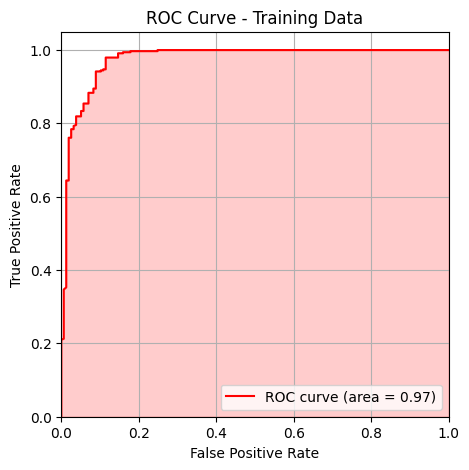

*****LGBMClassifier*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              1.000000  0.726115  0.841328  157.000
1              0.888601  1.000000  0.941015  343.000
accuracy       0.914000  0.914000  0.914000    0.914
macro avg      0.944301  0.863057  0.891172  500.000
weighted avg   0.923580  0.914000  0.909713  500.000

Precision_mean: 0.93

Recall_mean: 0.70

F1-Score: 0.94

ROC_AUC: 0.97

PR_intercept_Area: 0.98

Accuracy: 0.91




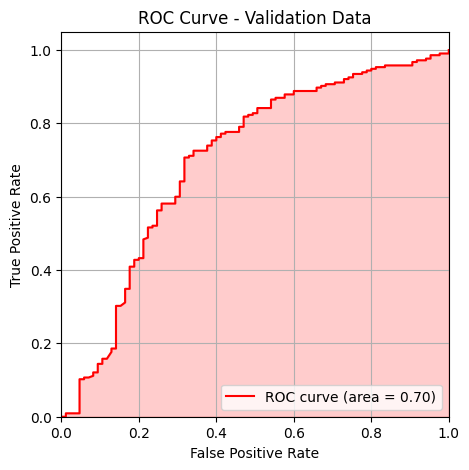

*****LGBMClassifier*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.555556  0.294118  0.384615   85.000000
1              0.764706  0.906977  0.829787  215.000000
accuracy       0.733333  0.733333  0.733333    0.733333
macro avg      0.660131  0.600547  0.607201  300.000000
weighted avg   0.705447  0.733333  0.703655  300.000000

Precision_mean: 0.79

Recall_mean: 0.60

F1-Score: 0.83

ROC_AUC: 0.70

PR_intercept_Area: 0.80

Accuracy: 0.73




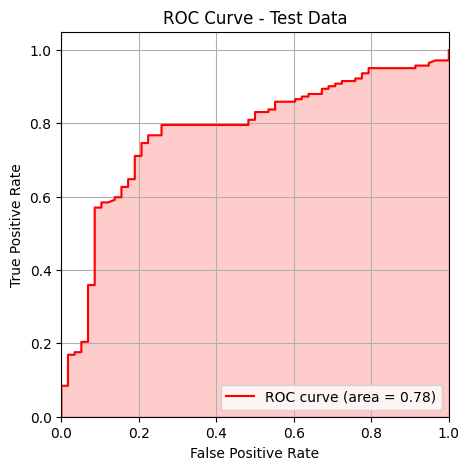

*****LGBMClassifier*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.542857  0.327586  0.408602   58.000
1              0.763636  0.887324  0.820847  142.000
accuracy       0.725000  0.725000  0.725000    0.725
macro avg      0.653247  0.607455  0.614725  200.000
weighted avg   0.699610  0.725000  0.701296  200.000

Precision_mean: 0.86

Recall_mean: 0.60

F1-Score: 0.82

ROC_AUC: 0.78

PR_intercept_Area: 0.89

Accuracy: 0.72


Fitting 10 folds for each of 2160 candidates, totalling 21600 fits
Grid Search Time: 4768.56 milliseconds
***** ExtraTreeClassifier *****
Cross-validation accuracy (Training): 0.72
Grid Search Best Score : 0.72
Training Time: 3.99 milliseconds
Validation Time: 4.08 milliseconds
Test Time: 0.00 milliseconds


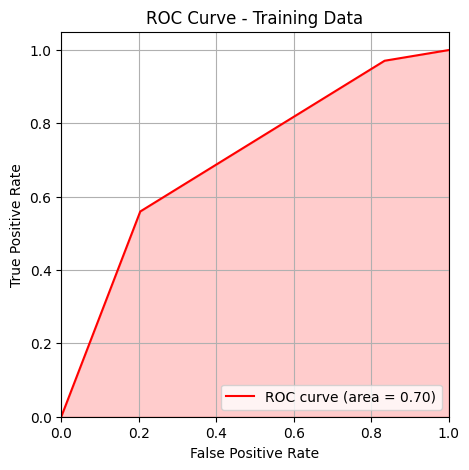

*****ExtraTreeClassifier*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.722222  0.165605  0.269430  157.000
1              0.717672  0.970845  0.825279  343.000
accuracy       0.718000  0.718000  0.718000    0.718
macro avg      0.719947  0.568225  0.547354  500.000
weighted avg   0.719101  0.718000  0.650742  500.000

Precision_mean: 0.82

Recall_mean: 0.63

F1-Score: 0.83

ROC_AUC: 0.70

PR_intercept_Area: 0.86

Accuracy: 0.72




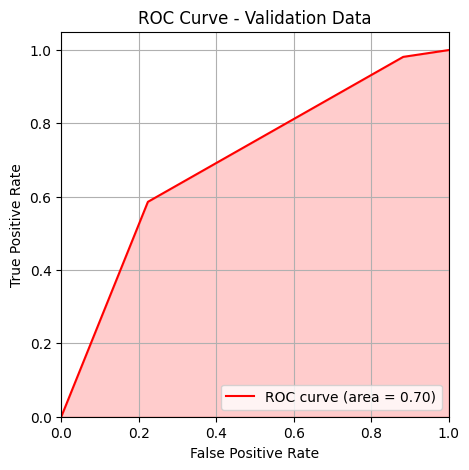

*****ExtraTreeClassifier*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.714286  0.117647  0.202020   85.000000
1              0.737762  0.981395  0.842315  215.000000
accuracy       0.736667  0.736667  0.736667    0.736667
macro avg      0.726024  0.549521  0.522168  300.000000
weighted avg   0.731111  0.736667  0.660898  300.000000

Precision_mean: 0.83

Recall_mean: 0.64

F1-Score: 0.84

ROC_AUC: 0.70

PR_intercept_Area: 0.88

Accuracy: 0.74




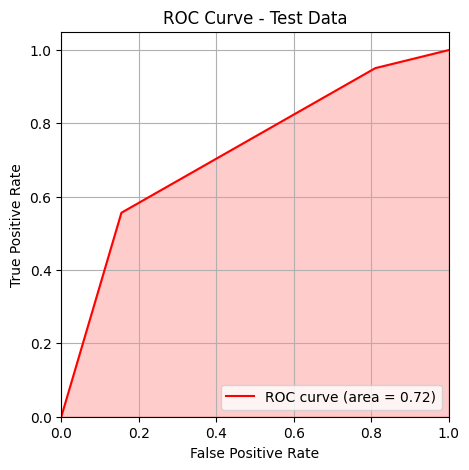

*****ExtraTreeClassifier*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.611111  0.189655  0.289474    58.00
1              0.741758  0.950704  0.833333   142.00
accuracy       0.730000  0.730000  0.730000     0.73
macro avg      0.676435  0.570180  0.561404   200.00
weighted avg   0.703871  0.730000  0.675614   200.00

Precision_mean: 0.84

Recall_mean: 0.63

F1-Score: 0.83

ROC_AUC: 0.72

PR_intercept_Area: 0.89

Accuracy: 0.73


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: 93.10 milliseconds
***** SVC *****
Cross-validation accuracy (Training): 0.69
Grid Search Best Score : 0.69
Training Time: 16.52 milliseconds
Validation Time: 15.51 milliseconds
Test Time: 0.00 milliseconds


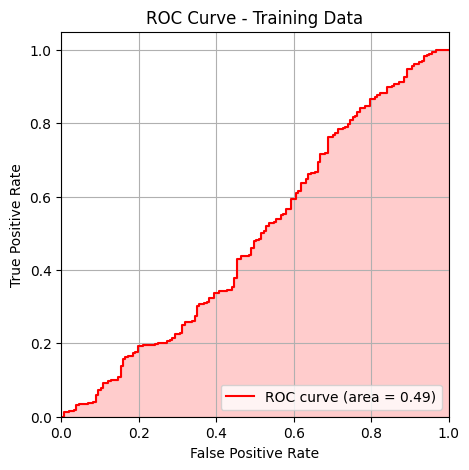

*****SVC*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.833333  0.031847  0.061350  157.000
1              0.692308  0.997085  0.817204  343.000
accuracy       0.694000  0.694000  0.694000    0.694
macro avg      0.762821  0.514466  0.439277  500.000
weighted avg   0.736590  0.694000  0.579866  500.000

Precision_mean: 0.66

Recall_mean: 0.50

F1-Score: 0.82

ROC_AUC: 0.49

PR_intercept_Area: 0.67

Accuracy: 0.69




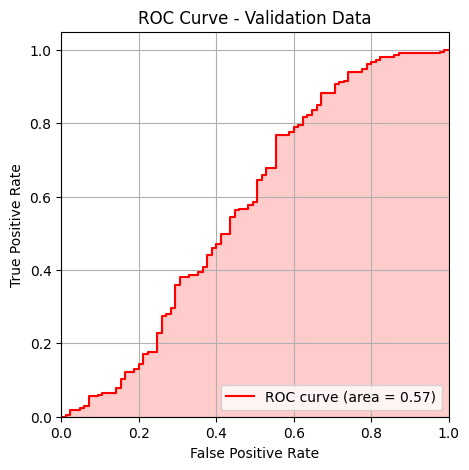

*****SVC*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.500000  0.023529  0.044944   85.000000
1              0.719595  0.990698  0.833659  215.000000
accuracy       0.716667  0.716667  0.716667    0.716667
macro avg      0.609797  0.507114  0.439302  300.000000
weighted avg   0.657376  0.716667  0.610190  300.000000

Precision_mean: 0.72

Recall_mean: 0.52

F1-Score: 0.83

ROC_AUC: 0.57

PR_intercept_Area: 0.72

Accuracy: 0.72




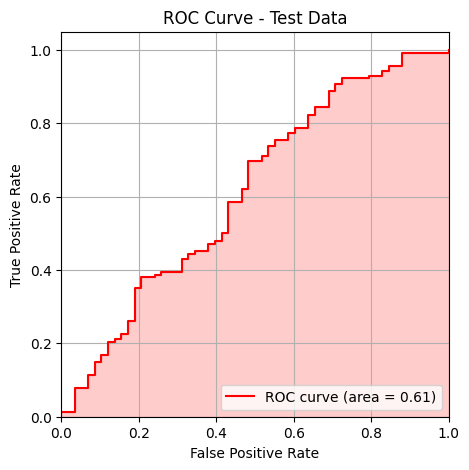

*****SVC*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.666667  0.034483  0.065574   58.000
1              0.715736  0.992958  0.831858  142.000
accuracy       0.715000  0.715000  0.715000    0.715
macro avg      0.691201  0.513720  0.448716  200.000
weighted avg   0.701506  0.715000  0.609636  200.000

Precision_mean: 0.77

Recall_mean: 0.53

F1-Score: 0.83

ROC_AUC: 0.61

PR_intercept_Area: 0.77

Accuracy: 0.71


Fitting 10 folds for each of 6 candidates, totalling 60 fits
Grid Search Time: 600.25 milliseconds
***** MLPClassifier *****
Cross-validation accuracy (Training): 0.69
Grid Search Best Score : 0.69
Training Time: 5.98 milliseconds
Validation Time: 2.87 milliseconds
Test Time: 0.00 milliseconds


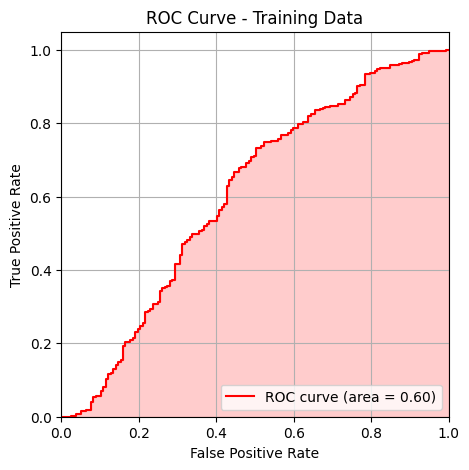

*****MLPClassifier*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.750000  0.019108  0.037267   157.00
1              0.689516  0.997085  0.815256   343.00
accuracy       0.690000  0.690000  0.690000     0.69
macro avg      0.719758  0.508096  0.426262   500.00
weighted avg   0.708508  0.690000  0.570968   500.00

Precision_mean: 0.70

Recall_mean: 0.53

F1-Score: 0.82

ROC_AUC: 0.60

PR_intercept_Area: 0.71

Accuracy: 0.69




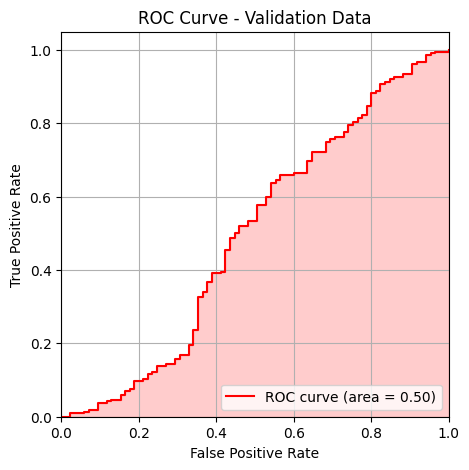

*****MLPClassifier*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.000000  0.000000  0.000000   85.000000
1              0.715719  0.995349  0.832685  215.000000
accuracy       0.713333  0.713333  0.713333    0.713333
macro avg      0.357860  0.497674  0.416342  300.000000
weighted avg   0.512932  0.713333  0.596757  300.000000

Precision_mean: 0.67

Recall_mean: 0.50

F1-Score: 0.83

ROC_AUC: 0.50

PR_intercept_Area: 0.68

Accuracy: 0.71




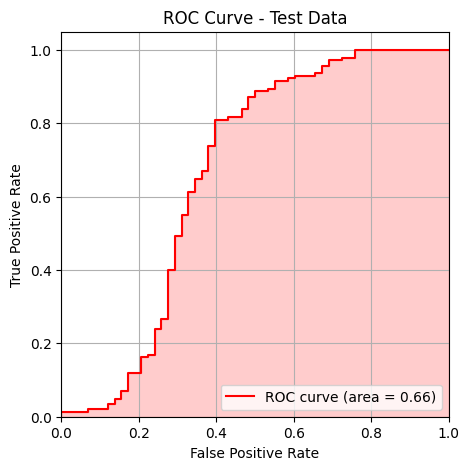

*****MLPClassifier*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              1.000000  0.086207   0.15873   58.000
1              0.728205  1.000000   0.84273  142.000
accuracy       0.735000  0.735000   0.73500    0.735
macro avg      0.864103  0.543103   0.50073  200.000
weighted avg   0.807026  0.735000   0.64437  200.000

Precision_mean: 0.74

Recall_mean: 0.55

F1-Score: 0.84

ROC_AUC: 0.66

PR_intercept_Area: 0.75

Accuracy: 0.73


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: 14.79 milliseconds
***** LinearDiscriminantAnalysis *****
Cross-validation accuracy (Training): 0.73
Grid Search Best Score : 0.73
Training Time: 13.95 milliseconds
Validation Time: 9.72 milliseconds
Test Time: 6.99 milliseconds


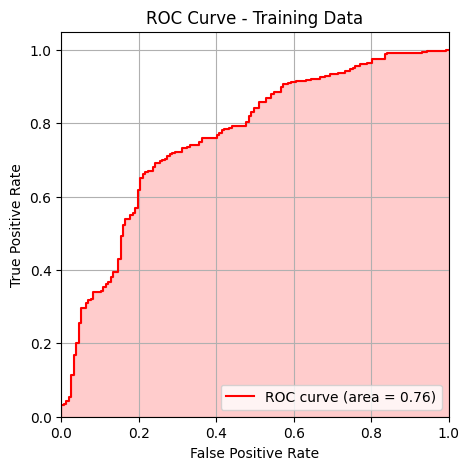

*****LinearDiscriminantAnalysis*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.621849  0.471338  0.536232  157.000
1              0.782152  0.868805  0.823204  343.000
accuracy       0.744000  0.744000  0.744000    0.744
macro avg      0.702000  0.670071  0.679718  500.000
weighted avg   0.731817  0.744000  0.733095  500.000

Precision_mean: 0.84

Recall_mean: 0.58

F1-Score: 0.82

ROC_AUC: 0.76

PR_intercept_Area: 0.86

Accuracy: 0.74




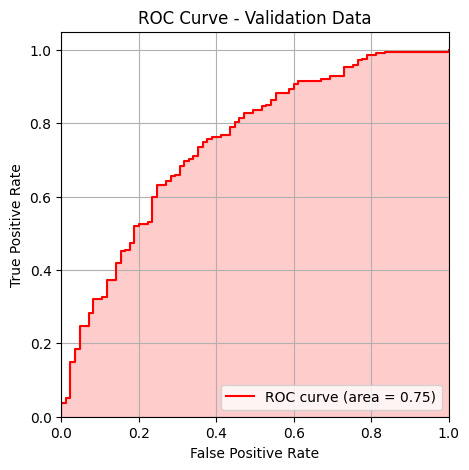

*****LinearDiscriminantAnalysis*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.603448  0.411765  0.489510   85.000000
1              0.793388  0.893023  0.840263  215.000000
accuracy       0.756667  0.756667  0.756667    0.756667
macro avg      0.698418  0.652394  0.664887  300.000000
weighted avg   0.739572  0.756667  0.740883  300.000000

Precision_mean: 0.85

Recall_mean: 0.57

F1-Score: 0.84

ROC_AUC: 0.75

PR_intercept_Area: 0.86

Accuracy: 0.76




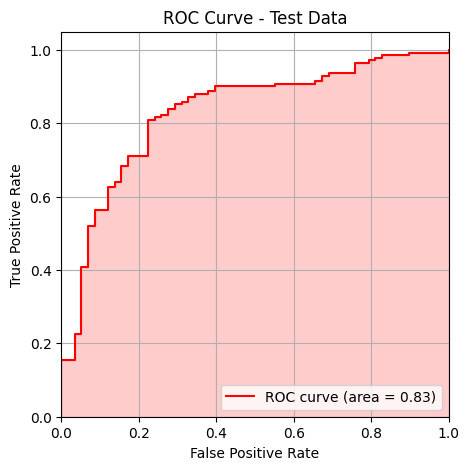

*****LinearDiscriminantAnalysis*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.695652  0.551724  0.615385     58.0
1              0.831169  0.901408  0.864865    142.0
accuracy       0.800000  0.800000  0.800000      0.8
macro avg      0.763411  0.726566  0.740125    200.0
weighted avg   0.791869  0.800000  0.792516    200.0

Precision_mean: 0.89

Recall_mean: 0.60

F1-Score: 0.86

ROC_AUC: 0.83

PR_intercept_Area: 0.92

Accuracy: 0.80


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: 15.23 milliseconds
***** QuadraticDiscriminantAnalysis *****
Cross-validation accuracy (Training): 0.72
Grid Search Best Score : 0.72
Training Time: 6.67 milliseconds
Validation Time: 6.00 milliseconds
Test Time: 5.58 milliseconds


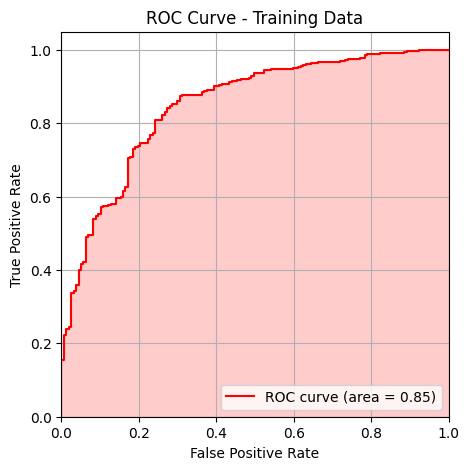

*****QuadraticDiscriminantAnalysis*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.721805  0.611465  0.662069  157.000
1              0.833787  0.892128  0.861972  343.000
accuracy       0.804000  0.804000  0.804000    0.804
macro avg      0.777796  0.751797  0.762020  500.000
weighted avg   0.798625  0.804000  0.799202  500.000

Precision_mean: 0.89

Recall_mean: 0.61

F1-Score: 0.86

ROC_AUC: 0.85

PR_intercept_Area: 0.92

Accuracy: 0.80




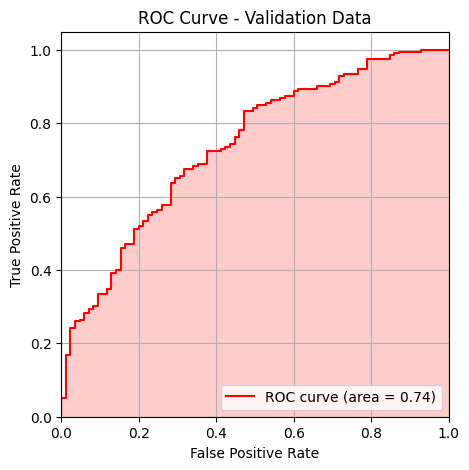

*****QuadraticDiscriminantAnalysis*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.563380  0.470588  0.512821   85.000000
1              0.803493  0.855814  0.828829  215.000000
accuracy       0.746667  0.746667  0.746667    0.746667
macro avg      0.683437  0.663201  0.670825  300.000000
weighted avg   0.735461  0.746667  0.739293  300.000000

Precision_mean: 0.85

Recall_mean: 0.57

F1-Score: 0.83

ROC_AUC: 0.74

PR_intercept_Area: 0.87

Accuracy: 0.75




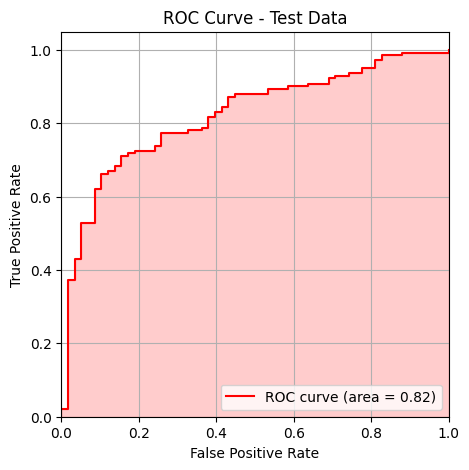

*****QuadraticDiscriminantAnalysis*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.653061  0.551724  0.598131   58.000
1              0.827815  0.880282  0.853242  142.000
accuracy       0.785000  0.785000  0.785000    0.785
macro avg      0.740438  0.716003  0.725687  200.000
weighted avg   0.777136  0.785000  0.779260  200.000

Precision_mean: 0.88

Recall_mean: 0.59

F1-Score: 0.85

ROC_AUC: 0.82

PR_intercept_Area: 0.91

Accuracy: 0.79


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: 144.53 milliseconds
***** AdaBoostClassifier *****
Cross-validation accuracy (Training): 0.71
Grid Search Best Score : 0.71
Training Time: 9.97 milliseconds
Validation Time: 9.22 milliseconds
Test Time: 9.98 milliseconds


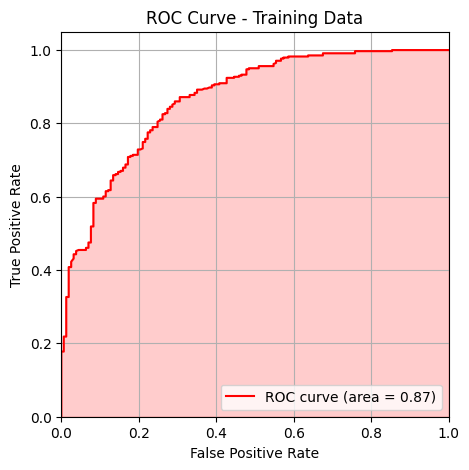

*****AdaBoostClassifier*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.769231  0.573248  0.656934  157.000
1              0.825065  0.921283  0.870523  343.000
accuracy       0.812000  0.812000  0.812000    0.812
macro avg      0.797148  0.747266  0.763729  500.000
weighted avg   0.807533  0.812000  0.803456  500.000

Precision_mean: 0.89

Recall_mean: 0.62

F1-Score: 0.87

ROC_AUC: 0.87

PR_intercept_Area: 0.93

Accuracy: 0.81




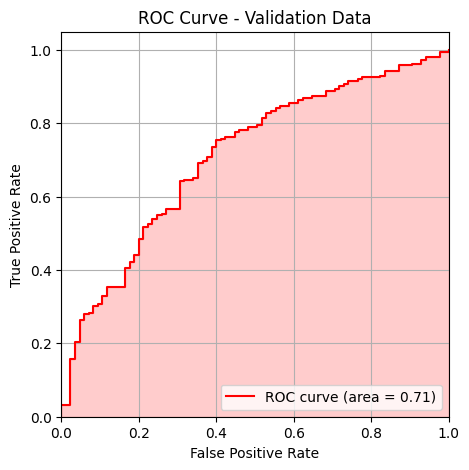

*****AdaBoostClassifier*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.524590  0.376471  0.438356   85.000000
1              0.778243  0.865116  0.819383  215.000000
accuracy       0.726667  0.726667  0.726667    0.726667
macro avg      0.651416  0.620793  0.628870  300.000000
weighted avg   0.706374  0.726667  0.711426  300.000000

Precision_mean: 0.84

Recall_mean: 0.56

F1-Score: 0.82

ROC_AUC: 0.71

PR_intercept_Area: 0.85

Accuracy: 0.73




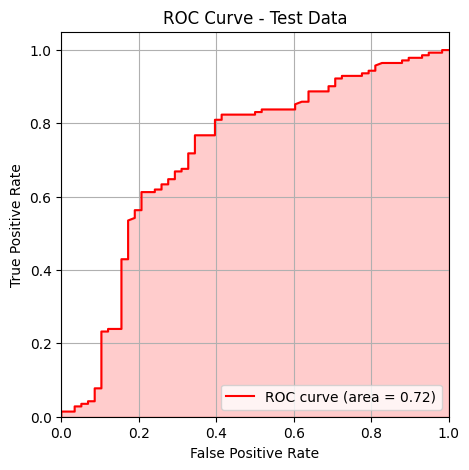

*****AdaBoostClassifier*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.520833  0.431034  0.471698    58.00
1              0.782895  0.838028  0.809524   142.00
accuracy       0.720000  0.720000  0.720000     0.72
macro avg      0.651864  0.634531  0.640611   200.00
weighted avg   0.706897  0.720000  0.711554   200.00

Precision_mean: 0.80

Recall_mean: 0.56

F1-Score: 0.81

ROC_AUC: 0.72

PR_intercept_Area: 0.81

Accuracy: 0.72


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: 56.35 milliseconds
***** BaggingClassifier *****
Cross-validation accuracy (Training): 0.67
Grid Search Best Score : 0.67
Training Time: 6.49 milliseconds
Validation Time: 5.42 milliseconds
Test Time: 5.17 milliseconds


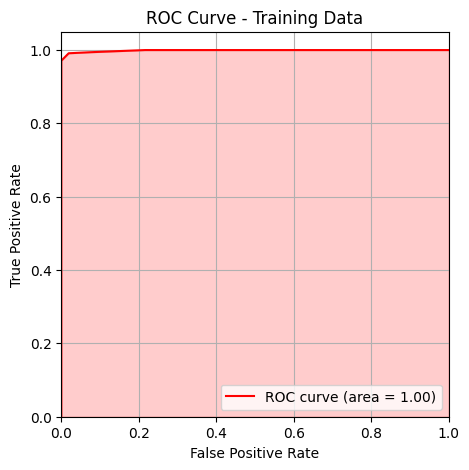

*****BaggingClassifier*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.980892  0.980892  0.980892  157.000
1              0.991254  0.991254  0.991254  343.000
accuracy       0.988000  0.988000  0.988000    0.988
macro avg      0.986073  0.986073  0.986073  500.000
weighted avg   0.988000  0.988000  0.988000  500.000

Precision_mean: 0.91

Recall_mean: 0.83

F1-Score: 0.99

ROC_AUC: 1.00

PR_intercept_Area: 1.00

Accuracy: 0.99




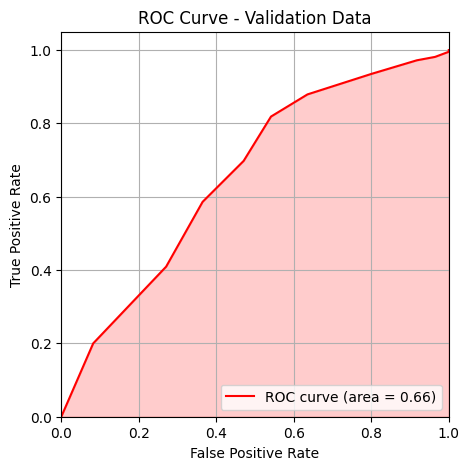

*****BaggingClassifier*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.500000  0.458824  0.478528   85.000000
1              0.792793  0.818605  0.805492  215.000000
accuracy       0.716667  0.716667  0.716667    0.716667
macro avg      0.646396  0.638714  0.642010  300.000000
weighted avg   0.709835  0.716667  0.712852  300.000000

Precision_mean: 0.79

Recall_mean: 0.71

F1-Score: 0.81

ROC_AUC: 0.66

PR_intercept_Area: 0.82

Accuracy: 0.72




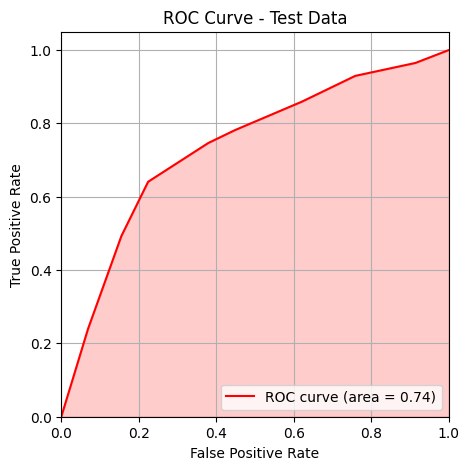

*****BaggingClassifier*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.507937  0.551724  0.528926   58.000
1              0.810219  0.781690  0.795699  142.000
accuracy       0.715000  0.715000  0.715000    0.715
macro avg      0.659078  0.666707  0.662312  200.000
weighted avg   0.722557  0.715000  0.718335  200.000

Precision_mean: 0.81

Recall_mean: 0.69

F1-Score: 0.80

ROC_AUC: 0.74

PR_intercept_Area: 0.87

Accuracy: 0.71


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: 632.52 milliseconds
***** GaussianProcessClassifier *****
Cross-validation accuracy (Training): 0.56
Grid Search Best Score : 0.56
Training Time: 39.72 milliseconds
Validation Time: 29.72 milliseconds
Test Time: 17.59 milliseconds


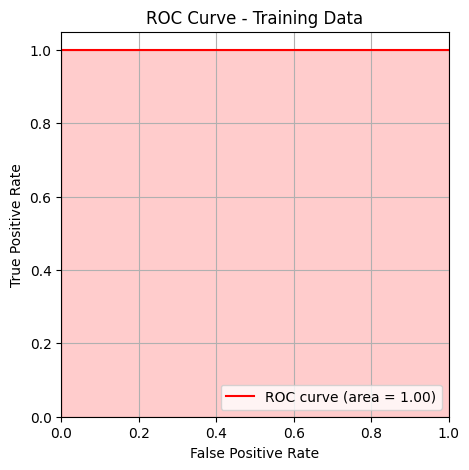

*****GaussianProcessClassifier*****
Stage: Training
Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0    157.0
1                   1.0     1.0       1.0    343.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    500.0
weighted avg        1.0     1.0       1.0    500.0

Precision_mean: 0.96

Recall_mean: 0.57

F1-Score: 1.00

ROC_AUC: 1.00

PR_intercept_Area: 1.00

Accuracy: 1.00




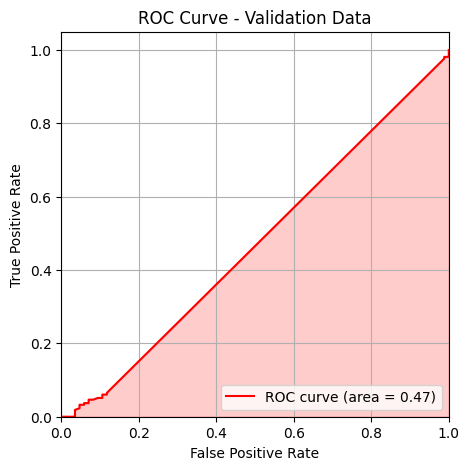

*****GaussianProcessClassifier*****
Stage: Validation
Classification Report:
              precision    recall  f1-score  support
0              0.291045  0.458824  0.356164    85.00
1              0.722892  0.558140  0.629921   215.00
accuracy       0.530000  0.530000  0.530000     0.53
macro avg      0.506968  0.508482  0.493043   300.00
weighted avg   0.600535  0.530000  0.552357   300.00

Precision_mean: 0.55

Recall_mean: 0.25

F1-Score: 0.63

ROC_AUC: 0.47

PR_intercept_Area: 0.64

Accuracy: 0.53




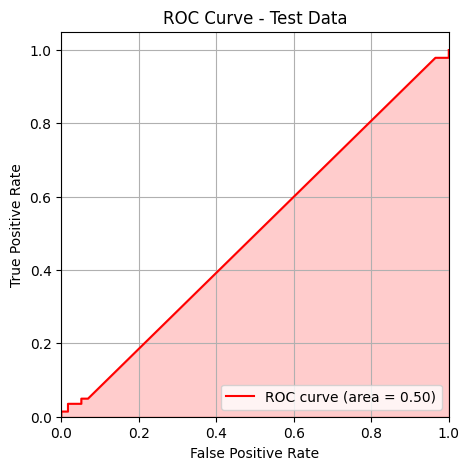

*****GaussianProcessClassifier*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.336957  0.534483  0.413333    58.00
1              0.750000  0.570423  0.648000   142.00
accuracy       0.560000  0.560000  0.560000     0.56
macro avg      0.543478  0.552453  0.530667   200.00
weighted avg   0.630217  0.560000  0.579947   200.00

Precision_mean: 0.76

Recall_mean: 0.35

F1-Score: 0.65

ROC_AUC: 0.50

PR_intercept_Area: 0.68

Accuracy: 0.56


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: 1294.88 milliseconds
***** LogisticRegressionCV *****
Cross-validation accuracy (Training): 0.70
Grid Search Best Score : 0.70
Training Time: 0.00 milliseconds
Validation Time: 0.00 milliseconds
Test Time: 15.57 milliseconds


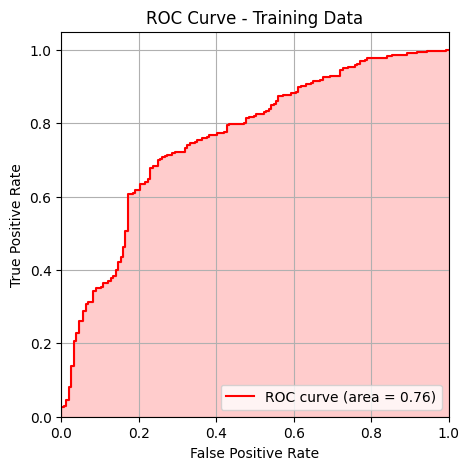

*****LogisticRegressionCV*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.607477  0.414013  0.492424  157.000
1              0.765903  0.877551  0.817935  343.000
accuracy       0.732000  0.732000  0.732000    0.732
macro avg      0.686690  0.645782  0.655180  500.000
weighted avg   0.716157  0.732000  0.715724  500.000

Precision_mean: 0.84

Recall_mean: 0.58

F1-Score: 0.82

ROC_AUC: 0.76

PR_intercept_Area: 0.86

Accuracy: 0.73




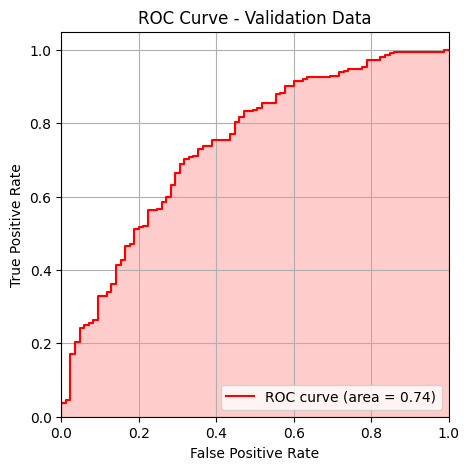

*****LogisticRegressionCV*****
Stage: Validation
Classification Report:
              precision    recall  f1-score  support
0              0.653846  0.400000  0.496350    85.00
1              0.794355  0.916279  0.850972   215.00
accuracy       0.770000  0.770000  0.770000     0.77
macro avg      0.724100  0.658140  0.673661   300.00
weighted avg   0.754544  0.770000  0.750496   300.00

Precision_mean: 0.85

Recall_mean: 0.57

F1-Score: 0.85

ROC_AUC: 0.74

PR_intercept_Area: 0.86

Accuracy: 0.77




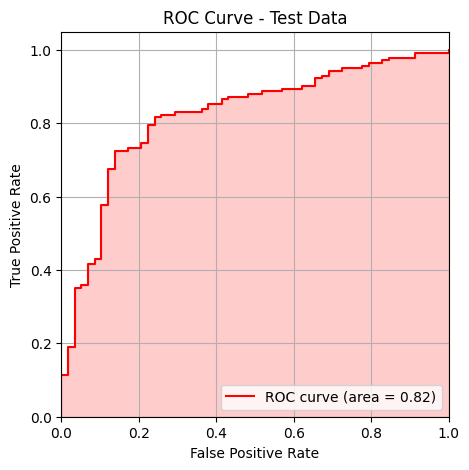

*****LogisticRegressionCV*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.609756  0.431034  0.505051   58.000
1              0.792453  0.887324  0.837209  142.000
accuracy       0.755000  0.755000  0.755000    0.755
macro avg      0.701104  0.659179  0.671130  200.000
weighted avg   0.739471  0.755000  0.740883  200.000

Precision_mean: 0.89

Recall_mean: 0.59

F1-Score: 0.84

ROC_AUC: 0.82

PR_intercept_Area: 0.91

Accuracy: 0.76


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: 12.30 milliseconds
***** PassiveAggressiveClassifier *****
Cross-validation accuracy (Training): 0.61
Grid Search Best Score : 0.61
Training Time: 14.64 milliseconds
Validation Time: 8.61 milliseconds
Test Time: 6.17 milliseconds


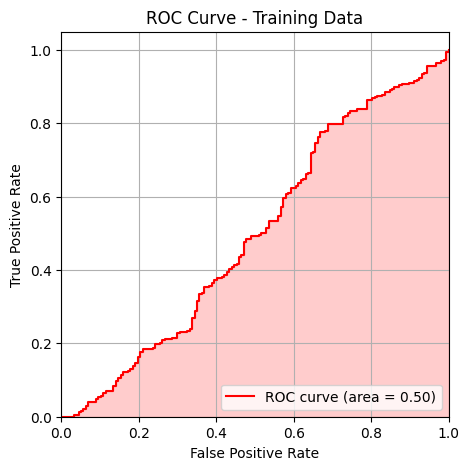

*****PassiveAggressiveClassifier*****
Stage: Training
Classification Report:
              precision  recall  f1-score  support
0              0.000000   0.000   0.00000  157.000
1              0.686000   1.000   0.81376  343.000
accuracy       0.686000   0.686   0.68600    0.686
macro avg      0.343000   0.500   0.40688  500.000
weighted avg   0.470596   0.686   0.55824  500.000

Precision_mean: 0.65

Recall_mean: 0.50

F1-Score: 0.81

ROC_AUC: 0.50

PR_intercept_Area: 0.66

Accuracy: 0.69




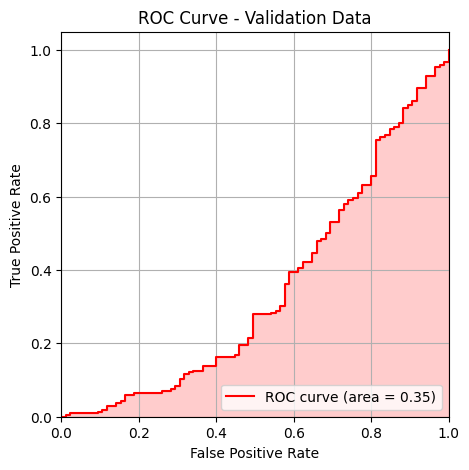

*****PassiveAggressiveClassifier*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.000000  0.000000  0.000000   85.000000
1              0.716667  1.000000  0.834951  215.000000
accuracy       0.716667  0.716667  0.716667    0.716667
macro avg      0.358333  0.500000  0.417476  300.000000
weighted avg   0.513611  0.716667  0.598382  300.000000

Precision_mean: 0.59

Recall_mean: 0.46

F1-Score: 0.83

ROC_AUC: 0.35

PR_intercept_Area: 0.61

Accuracy: 0.72




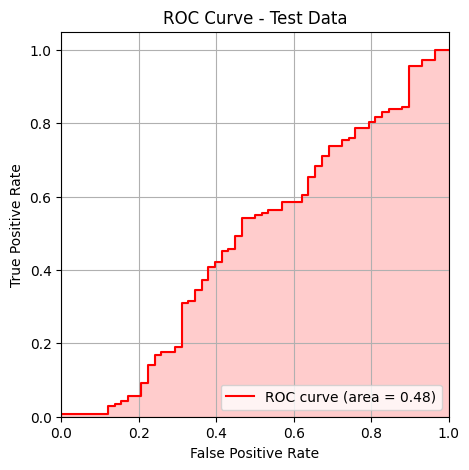

*****PassiveAggressiveClassifier*****
Stage: Test
Classification Report:
              precision  recall  f1-score  support
0                0.0000    0.00  0.000000    58.00
1                0.7100    1.00  0.830409   142.00
accuracy         0.7100    0.71  0.710000     0.71
macro avg        0.3550    0.50  0.415205   200.00
weighted avg     0.5041    0.71  0.589591   200.00

Precision_mean: 0.66

Recall_mean: 0.49

F1-Score: 0.83

ROC_AUC: 0.48

PR_intercept_Area: 0.67

Accuracy: 0.71


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: 15.19 milliseconds
***** SGDClassifier *****
Cross-validation accuracy (Training): 0.46
Grid Search Best Score : 0.46
Training Time: 6.17 milliseconds
Validation Time: 4.98 milliseconds
Test Time: 6.56 milliseconds


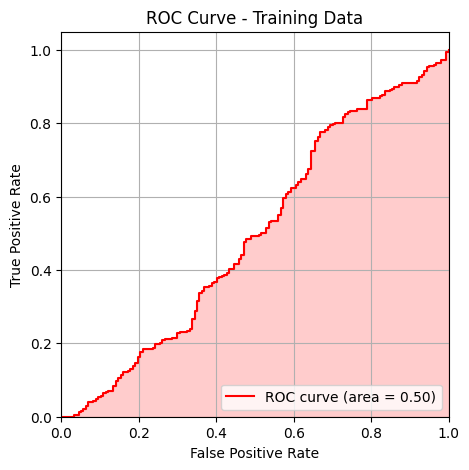

*****SGDClassifier*****
Stage: Training
Classification Report:
              precision  recall  f1-score  support
0              0.000000   0.000   0.00000  157.000
1              0.686000   1.000   0.81376  343.000
accuracy       0.686000   0.686   0.68600    0.686
macro avg      0.343000   0.500   0.40688  500.000
weighted avg   0.470596   0.686   0.55824  500.000

Precision_mean: 0.65

Recall_mean: 0.50

F1-Score: 0.81

ROC_AUC: 0.50

PR_intercept_Area: 0.66

Accuracy: 0.69




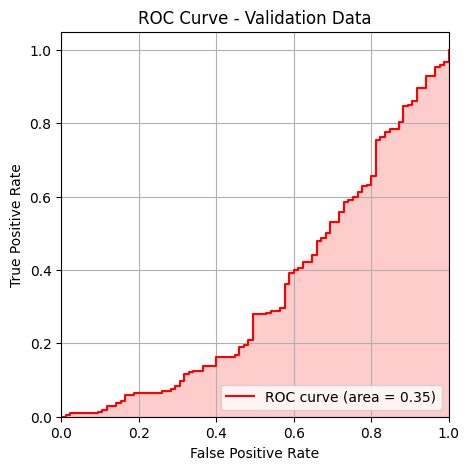

*****SGDClassifier*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.000000  0.000000  0.000000   85.000000
1              0.716667  1.000000  0.834951  215.000000
accuracy       0.716667  0.716667  0.716667    0.716667
macro avg      0.358333  0.500000  0.417476  300.000000
weighted avg   0.513611  0.716667  0.598382  300.000000

Precision_mean: 0.59

Recall_mean: 0.46

F1-Score: 0.83

ROC_AUC: 0.35

PR_intercept_Area: 0.61

Accuracy: 0.72




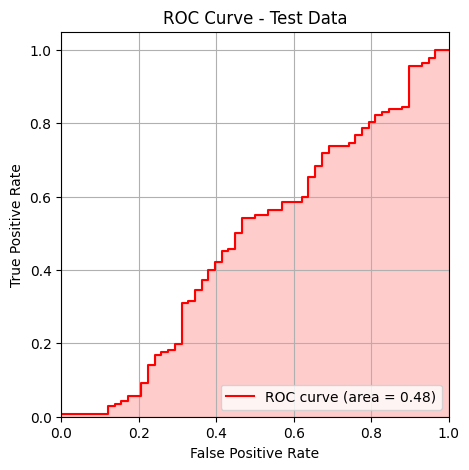

*****SGDClassifier*****
Stage: Test
Classification Report:
              precision  recall  f1-score  support
0                0.0000    0.00  0.000000    58.00
1                0.7100    1.00  0.830409   142.00
accuracy         0.7100    0.71  0.710000     0.71
macro avg        0.3550    0.50  0.415205   200.00
weighted avg     0.5041    0.71  0.589591   200.00

Precision_mean: 0.66

Recall_mean: 0.49

F1-Score: 0.83

ROC_AUC: 0.48

PR_intercept_Area: 0.67

Accuracy: 0.71


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: 16.26 milliseconds
***** Perceptron *****
Cross-validation accuracy (Training): 0.54
Grid Search Best Score : 0.54
Training Time: 4.98 milliseconds
Validation Time: 5.17 milliseconds
Test Time: 5.89 milliseconds


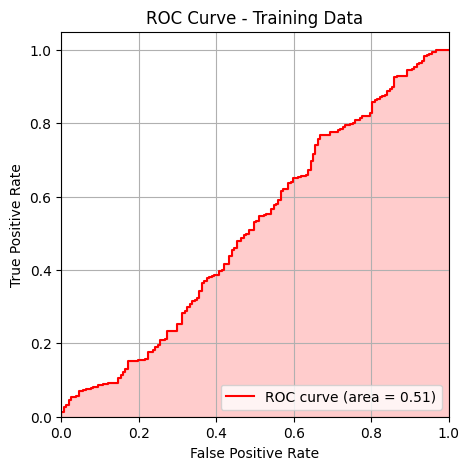

*****Perceptron*****
Stage: Training
Classification Report:
              precision  recall  f1-score  support
0              0.314000   1.000  0.477930  157.000
1              0.000000   0.000  0.000000  343.000
accuracy       0.314000   0.314  0.314000    0.314
macro avg      0.157000   0.500  0.238965  500.000
weighted avg   0.098596   0.314  0.150070  500.000

Precision_mean: 0.69

Recall_mean: 0.50

F1-Score: 0.00

ROC_AUC: 0.51

PR_intercept_Area: 0.69

Accuracy: 0.31




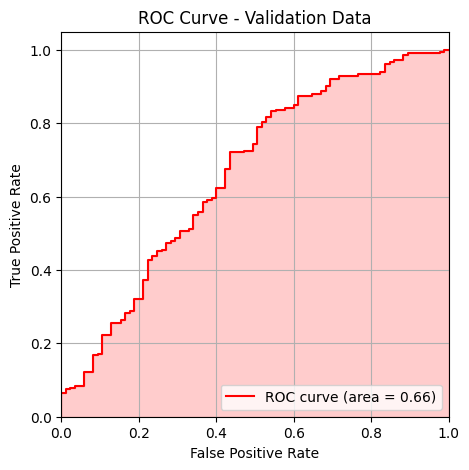

*****Perceptron*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.283333  1.000000  0.441558   85.000000
1              0.000000  0.000000  0.000000  215.000000
accuracy       0.283333  0.283333  0.283333    0.283333
macro avg      0.141667  0.500000  0.220779  300.000000
weighted avg   0.080278  0.283333  0.125108  300.000000

Precision_mean: 0.81

Recall_mean: 0.55

F1-Score: 0.00

ROC_AUC: 0.66

PR_intercept_Area: 0.81

Accuracy: 0.28




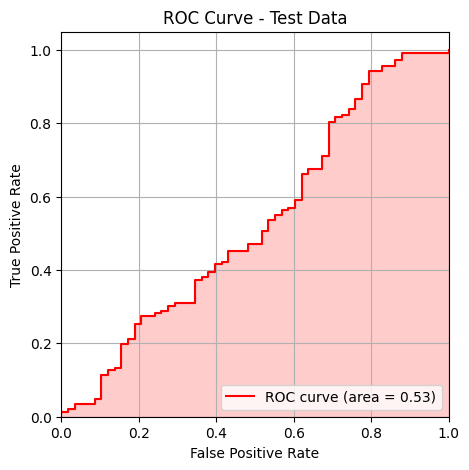

*****Perceptron*****
Stage: Test
Classification Report:
              precision  recall  f1-score  support
0                0.2900    1.00  0.449612    58.00
1                0.0000    0.00  0.000000   142.00
accuracy         0.2900    0.29  0.290000     0.29
macro avg        0.1450    0.50  0.224806   200.00
weighted avg     0.0841    0.29  0.130388   200.00

Precision_mean: 0.72

Recall_mean: 0.51

F1-Score: 0.00

ROC_AUC: 0.53

PR_intercept_Area: 0.72

Accuracy: 0.29


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: 32.39 milliseconds
***** BernoulliNB *****
Cross-validation accuracy (Training): 0.70
Grid Search Best Score : 0.70
Training Time: 5.98 milliseconds
Validation Time: 5.04 milliseconds
Test Time: 4.79 milliseconds


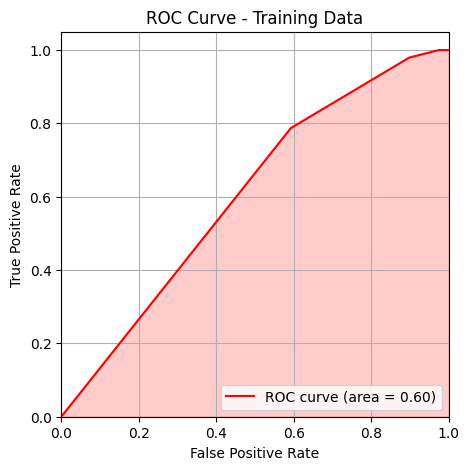

*****BernoulliNB*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.695652  0.101911  0.177778  157.000
1              0.704403  0.979592  0.819512  343.000
accuracy       0.704000  0.704000  0.704000    0.704
macro avg      0.700027  0.540751  0.498645  500.000
weighted avg   0.701655  0.704000  0.618008  500.000

Precision_mean: 0.77

Recall_mean: 0.75

F1-Score: 0.82

ROC_AUC: 0.60

PR_intercept_Area: 0.84

Accuracy: 0.70




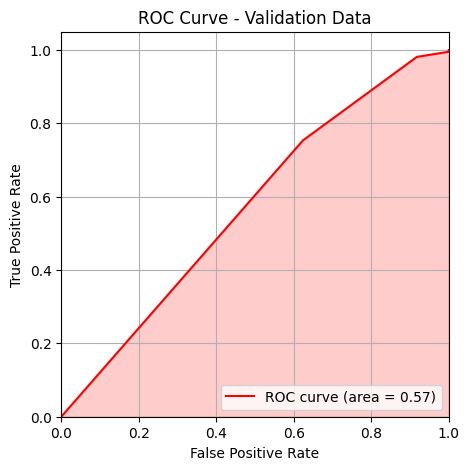

*****BernoulliNB*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.636364  0.082353  0.145833   85.000000
1              0.730104  0.981395  0.837302  215.000000
accuracy       0.726667  0.726667  0.726667    0.726667
macro avg      0.683234  0.531874  0.491567  300.000000
weighted avg   0.703544  0.726667  0.641386  300.000000

Precision_mean: 0.78

Recall_mean: 0.75

F1-Score: 0.84

ROC_AUC: 0.57

PR_intercept_Area: 0.84

Accuracy: 0.73




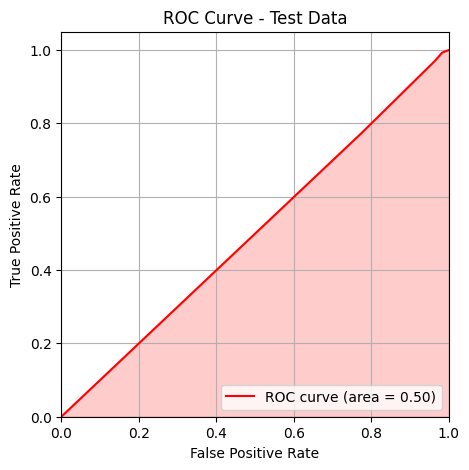

*****BernoulliNB*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.333333  0.034483  0.062500     58.0
1              0.711340  0.971831  0.821429    142.0
accuracy       0.700000  0.700000  0.700000      0.7
macro avg      0.522337  0.503157  0.441964    200.0
weighted avg   0.601718  0.700000  0.601339    200.0

Precision_mean: 0.77

Recall_mean: 0.75

F1-Score: 0.82

ROC_AUC: 0.50

PR_intercept_Area: 0.82

Accuracy: 0.70


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: 78.43 milliseconds
***** NuSVC *****
Cross-validation accuracy (Training): 0.59
Grid Search Best Score : 0.59
Training Time: 15.00 milliseconds
Validation Time: 16.33 milliseconds
Test Time: 2.96 milliseconds


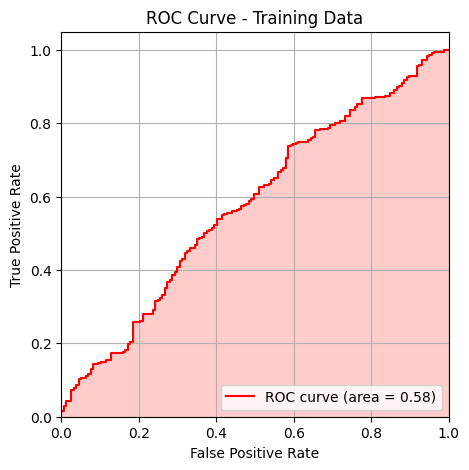

*****NuSVC*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.365482  0.458599  0.406780   157.00
1              0.719472  0.635569  0.674923   343.00
accuracy       0.580000  0.580000  0.580000     0.58
macro avg      0.542477  0.547084  0.540851   500.00
weighted avg   0.608319  0.580000  0.590726   500.00

Precision_mean: 0.74

Recall_mean: 0.52

F1-Score: 0.67

ROC_AUC: 0.58

PR_intercept_Area: 0.74

Accuracy: 0.58




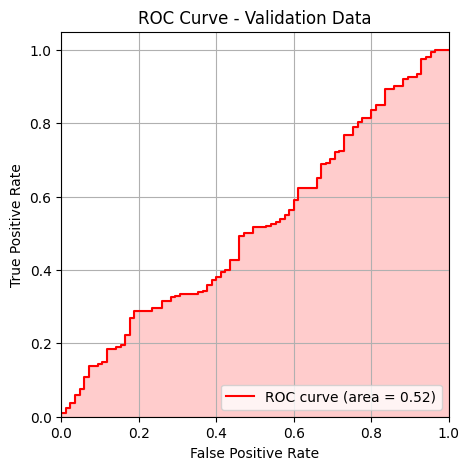

*****NuSVC*****
Stage: Validation
Classification Report:
              precision    recall  f1-score     support
0              0.263636  0.341176  0.297436   85.000000
1              0.705263  0.623256  0.661728  215.000000
accuracy       0.543333  0.543333  0.543333    0.543333
macro avg      0.484450  0.482216  0.479582  300.000000
weighted avg   0.580136  0.543333  0.558512  300.000000

Precision_mean: 0.74

Recall_mean: 0.51

F1-Score: 0.66

ROC_AUC: 0.52

PR_intercept_Area: 0.74

Accuracy: 0.54




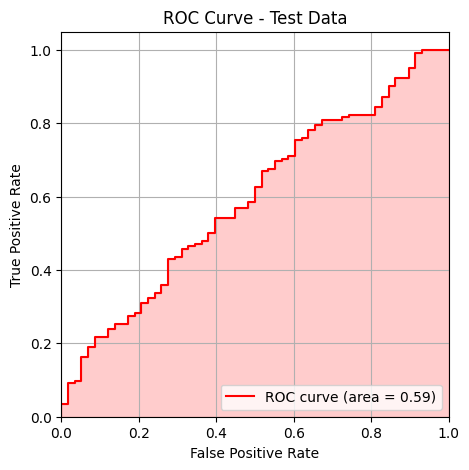

*****NuSVC*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.345238  0.500000  0.408451    58.00
1              0.750000  0.612676  0.674419   142.00
accuracy       0.580000  0.580000  0.580000     0.58
macro avg      0.547619  0.556338  0.541435   200.00
weighted avg   0.632619  0.580000  0.597288   200.00

Precision_mean: 0.78

Recall_mean: 0.53

F1-Score: 0.67

ROC_AUC: 0.59

PR_intercept_Area: 0.78

Accuracy: 0.58


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: 26.53 milliseconds
***** LinearSVC *****
Cross-validation accuracy (Training): 0.69
Grid Search Best Score : 0.69
Training Time: 3.99 milliseconds
Validation Time: 4.98 milliseconds
Test Time: 4.17 milliseconds


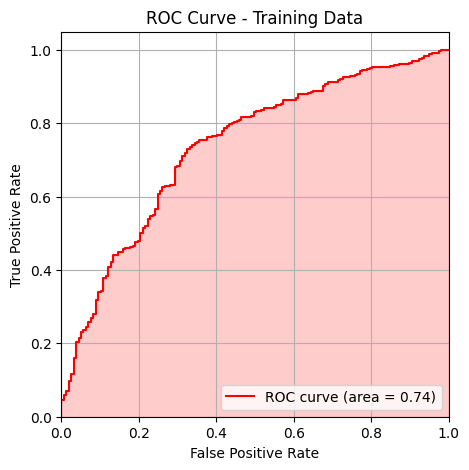

*****LinearSVC*****
Stage: Training
Classification Report:
              precision    recall  f1-score  support
0              0.593750  0.121019  0.201058  157.000
1              0.705128  0.962099  0.813810  343.000
accuracy       0.698000  0.698000  0.698000    0.698
macro avg      0.649439  0.541559  0.507434  500.000
weighted avg   0.670155  0.698000  0.621406  500.000

Precision_mean: 0.83

Recall_mean: 0.57

F1-Score: 0.81

ROC_AUC: 0.74

PR_intercept_Area: 0.85

Accuracy: 0.70




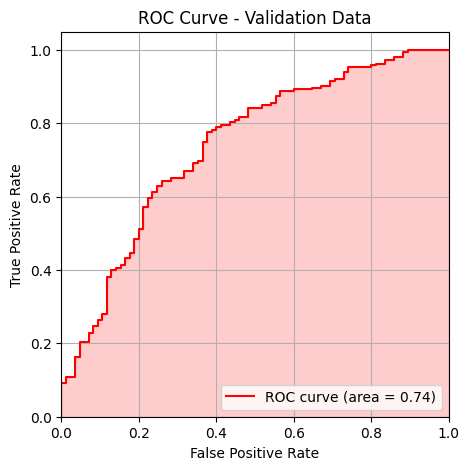

*****LinearSVC*****
Stage: Validation
Classification Report:
              precision    recall  f1-score  support
0              0.666667  0.164706  0.264151    85.00
1              0.745520  0.967442  0.842105   215.00
accuracy       0.740000  0.740000  0.740000     0.74
macro avg      0.706093  0.566074  0.553128   300.00
weighted avg   0.723178  0.740000  0.678352   300.00

Precision_mean: 0.85

Recall_mean: 0.57

F1-Score: 0.84

ROC_AUC: 0.74

PR_intercept_Area: 0.86

Accuracy: 0.74




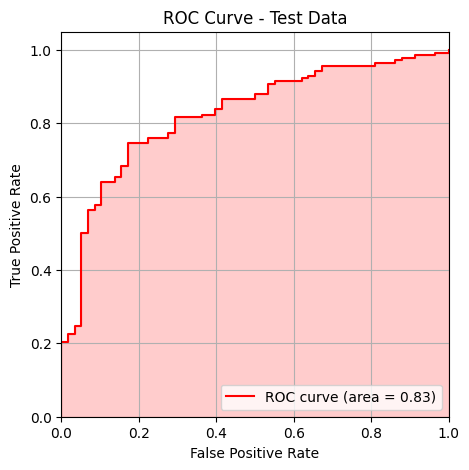

*****LinearSVC*****
Stage: Test
Classification Report:
              precision    recall  f1-score  support
0              0.666667  0.172414  0.273973   58.000
1              0.740541  0.964789  0.837920  142.000
accuracy       0.735000  0.735000  0.735000    0.735
macro avg      0.703604  0.568601  0.555947  200.000
weighted avg   0.719117  0.735000  0.674376  200.000

Precision_mean: 0.89

Recall_mean: 0.59

F1-Score: 0.84

ROC_AUC: 0.83

PR_intercept_Area: 0.92

Accuracy: 0.73




In [431]:
for i in range(len(param)) :
    ML(model[i],param[i])

In [390]:
lst = ['train','test','val','representative']

for i in lst : 
    source = [item for sublist in globals()[f'{i}_score'] for item in sublist]
    globals()[f'{i}_bar'] = pd.DataFrame(source)

print(train_bar)
print(test_bar)
print(val_bar)
print(representative_bar)

    ROC_AUC_train  PR_AUC_train  Recall_train  Precision_train  \
0        0.749680      0.856679      0.578243         0.836087   
1        0.777367      0.886072      0.655653         0.834470   
2        0.999647      0.999836      0.656576         0.944223   
3        0.874143      0.929770      0.640241         0.886830   
4        0.775445      0.901767      0.683465         0.815292   
5        0.749568      0.857931      0.578208         0.836952   
6        0.976324      0.987467      0.649267         0.935581   
7        0.974485      0.984618      0.699135         0.928640   
8        0.702819      0.863932      0.632653         0.815204   
9        0.493473      0.665578      0.497955         0.664656   
10       0.603721      0.711231      0.532504         0.703409   
11       0.762920      0.856137      0.582392         0.836222   
12       0.848545      0.919546      0.609225         0.885032   
13       0.865796      0.929987      0.618211         0.891200   
14       0

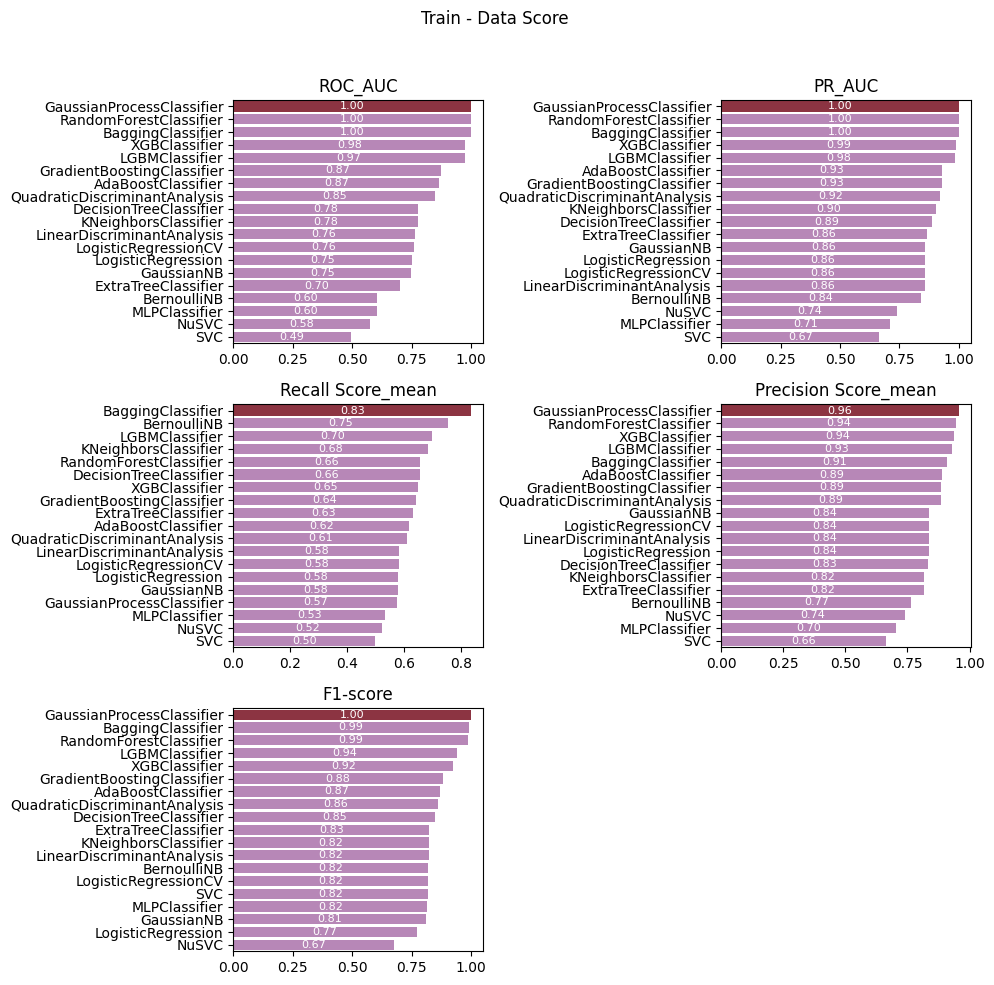

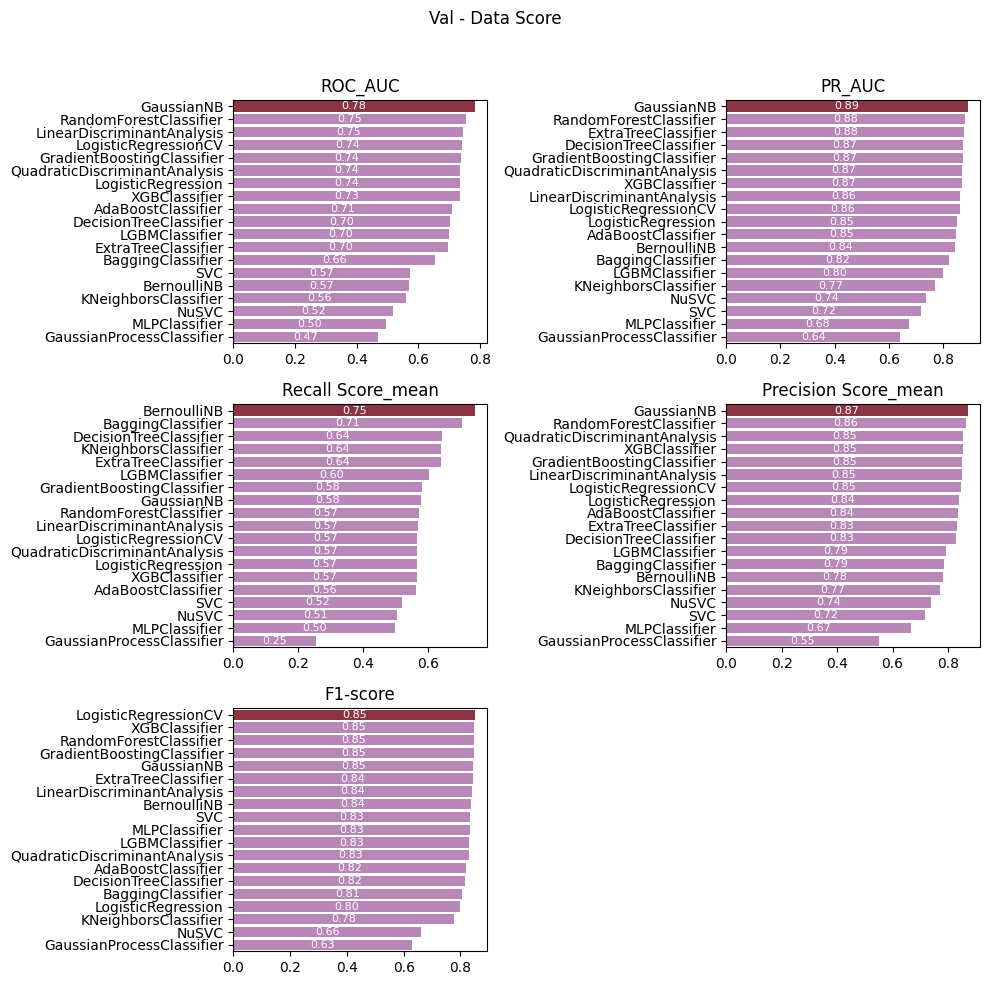

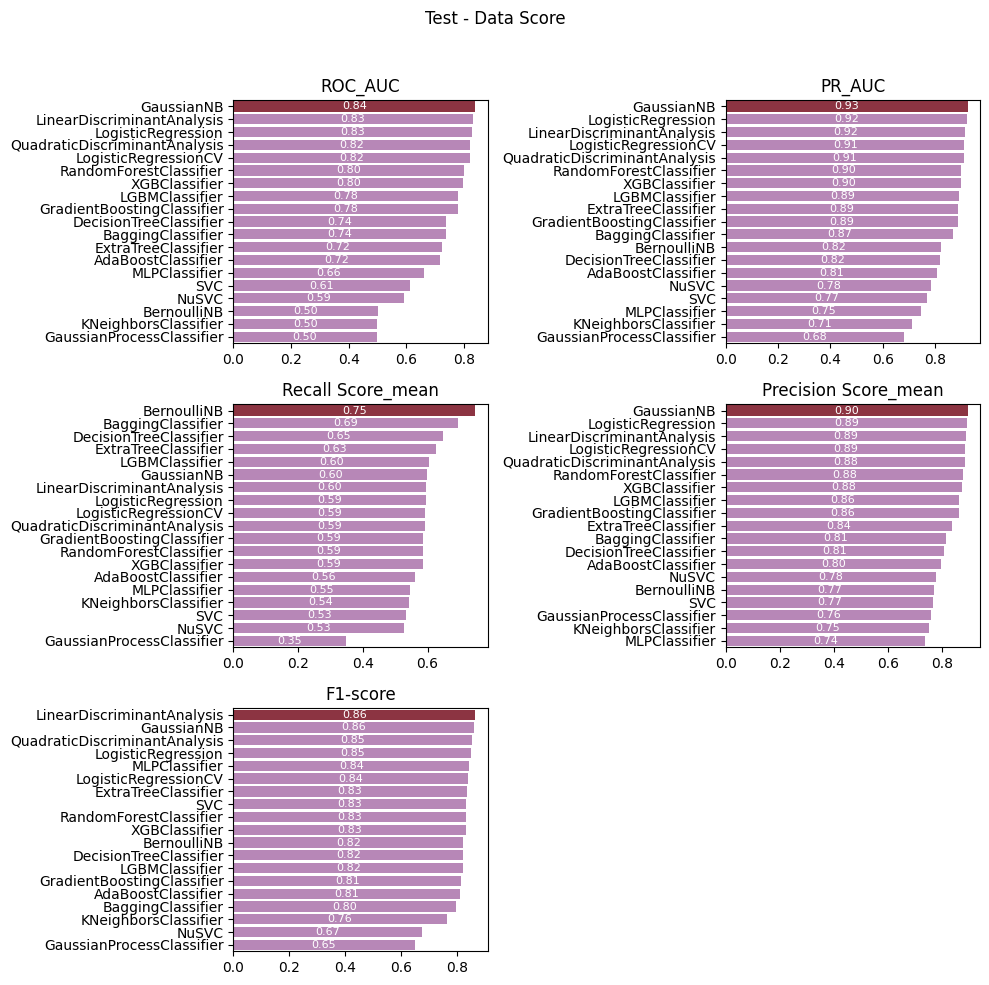

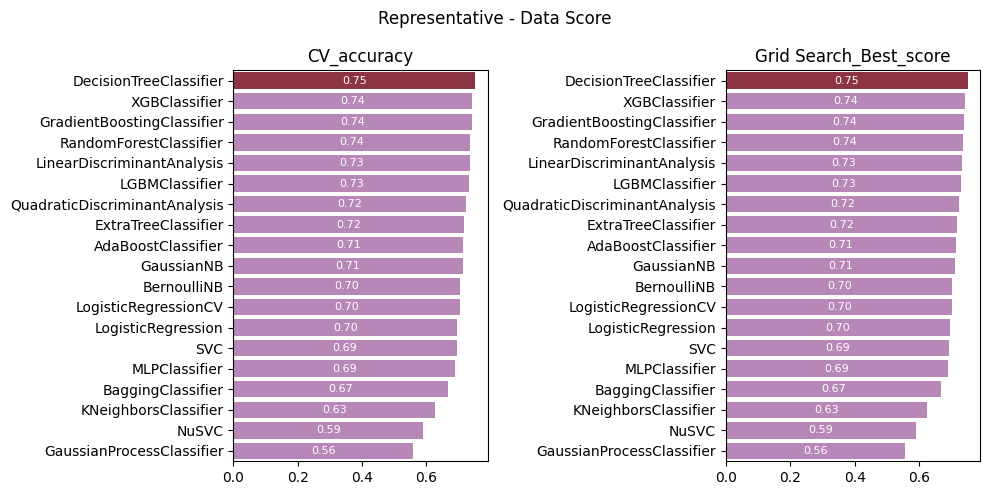

In [392]:
graph_lst = ['train', 'val', 'test']

for i in graph_lst:  
    fig, axes = plt.subplots(3, 2, figsize=(10, 10))

    sns.barplot(data=globals()[f'{i}_bar'].sort_values(f'ROC_AUC_{i}', ascending=False),
                x=f'ROC_AUC_{i}', y='Model', color='purple', alpha=0.5, ax=axes[0, 0])
    
    top_roc_auc = globals()[f'{i}_bar'].sort_values(f'ROC_AUC_{i}', ascending=False).head(1)
    sns.barplot(data=top_roc_auc, 
                x=f'ROC_AUC_{i}', y='Model', color='darkred',alpha=0.7, ax=axes[0, 0])

    axes[0, 0].bar_label(axes[0, 0].containers[0], fmt='%.2f', label_type='center', color='white', fontsize=8)    
    axes[0, 0].set_title('ROC_AUC')
    axes[0, 0].set_ylabel('')
    axes[0, 0].set_xlabel('')

    sns.barplot(data=globals()[f'{i}_bar'].sort_values(f'PR_AUC_{i}', ascending=False),
                x=f'PR_AUC_{i}', y='Model', color='purple', alpha=0.5, ax=axes[0, 1])
    
    top_pr_auc = globals()[f'{i}_bar'].sort_values(f'PR_AUC_{i}', ascending=False).head(1)
    sns.barplot(data=top_pr_auc, 
                x=f'PR_AUC_{i}', y='Model', color='darkred',alpha=0.7, ax=axes[0, 1])
    
    
    axes[0, 1].bar_label(axes[0, 1].containers[0], fmt='%.2f', label_type='center', color='white', fontsize=8)    
    axes[0, 1].set_title('PR_AUC')
    axes[0, 1].set_ylabel('')
    axes[0, 1].set_xlabel('')

    sns.barplot(data=globals()[f'{i}_bar'].sort_values(f'Recall_{i}', ascending=False),
                x=f'Recall_{i}', y='Model', color='purple', alpha=0.5, ax=axes[1, 0])
    
    top_recall = globals()[f'{i}_bar'].sort_values(f'Recall_{i}', ascending=False).head(1)
    sns.barplot(data=top_recall, 
                x=f'Recall_{i}', y='Model', color='darkred',alpha=0.7, ax=axes[1, 0])
    
    axes[1, 0].bar_label(axes[1, 0].containers[0], fmt='%.2f', label_type='center', color='white', fontsize=8)    
    axes[1, 0].set_title('Recall Score_mean')
    axes[1, 0].set_ylabel('')
    axes[1, 0].set_xlabel('')

    sns.barplot(data=globals()[f'{i}_bar'].sort_values(f'Precision_{i}', ascending=False),
                x=f'Precision_{i}', y='Model', color='purple', alpha=0.5, ax=axes[1, 1])
    
    top_pre = globals()[f'{i}_bar'].sort_values(f'Precision_{i}', ascending=False).head(1)
    sns.barplot(data=top_pre, 
                x=f'Precision_{i}', y='Model', color='darkred',alpha=0.7, ax=axes[1, 1])
    
    axes[1, 1].bar_label(axes[1, 1].containers[0], fmt='%.2f', label_type='center', color='white', fontsize=8)    
    axes[1, 1].set_title('Precision Score_mean')
    axes[1, 1].set_ylabel('')
    axes[1, 1].set_xlabel('')

    sns.barplot(data=globals()[f'{i}_bar'].sort_values(f'F1-score_{i}', ascending=False),
                x=f'F1-score_{i}', y='Model', color='purple', alpha=0.5, ax=axes[2, 0])
    
    top_f1 = globals()[f'{i}_bar'].sort_values(f'F1-score_{i}', ascending=False).head(1)
    sns.barplot(data=top_f1, 
                x=f'F1-score_{i}', y='Model', color='darkred',alpha=0.7, ax=axes[2, 0])
    axes[2, 0].bar_label(axes[2, 0].containers[0], fmt='%.2f', label_type='center', color='white', fontsize=8)    
    axes[2, 0].set_title('F1-score')
    axes[2, 0].set_ylabel('')
    axes[2, 0].set_xlabel('')

    fig.delaxes(axes[2, 1])

    fig.suptitle(f'{i.capitalize()} - Data Score')

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(data=representative_bar.sort_values('CV_score', ascending=False),
            x='CV_score', y='Model', color='purple', alpha=0.5, ax=axes[0])

sns.barplot(data =representative_bar.sort_values('CV_score',ascending=False).head(1), 
            x = 'CV_score', y= 'Model', color = 'darkred', alpha = .7, ax = axes[0])

axes[0].bar_label(axes[0].containers[0], fmt='%.2f', label_type = 'center', color = 'white', fontsize = 8)
axes[0].set_title('CV_accuracy')
axes[0].set_ylabel('')
axes[0].set_xlabel('')

sns.barplot(data=representative_bar.sort_values('Best_score', ascending=False),
            x='Best_score', y='Model', color='purple', alpha=0.5, ax=axes[1])

sns.barplot(data=representative_bar.sort_values('Best_score',ascending=False).head(1), 
            x = 'Best_score', y= 'Model', color = 'darkred', alpha = .7, ax = axes[1])

axes[1].bar_label(axes[1].containers[0], fmt='%.2f', label_type = 'center', color = 'white', fontsize = 8)
axes[1].set_title('Grid Search_Best_score')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
fig.suptitle('Representative - Data Score')
plt.tight_layout()
plt.show()


In [410]:
train_bar['Dataset'] = 'Train'
val_bar['Dataset'] = 'Validation'
test_bar['Dataset'] = 'Test'

combined_bar = pd.concat([train_bar, val_bar, test_bar], ignore_index=True)


In [394]:
combined_bar.melt(id_vars=['Model','Dataset'], value_vars=['ROC_AUC_train','ROC_AUC_val','ROC_AUC_test'])

,Model,Dataset,variable,value
0,LogisticRegression,Train,ROC_AUC_train,0.749680
1,DecisionTreeClassifier,Train,ROC_AUC_train,0.777367
2,RandomForestClassifier,Train,ROC_AUC_train,0.999647
3,GradientBoostingClassifier,Train,ROC_AUC_train,0.874143
4,KNeighborsClassifier,Train,ROC_AUC_train,0.775445
...,...,...,...,...
166,BaggingClassifier,Test,ROC_AUC_test,0.735733
167,GaussianProcessClassifier,Test,ROC_AUC_test,0.496965
168,LogisticRegressionCV,Test,ROC_AUC_test,0.821151
169,BernoulliNB,Test,ROC_AUC_test,0.500243


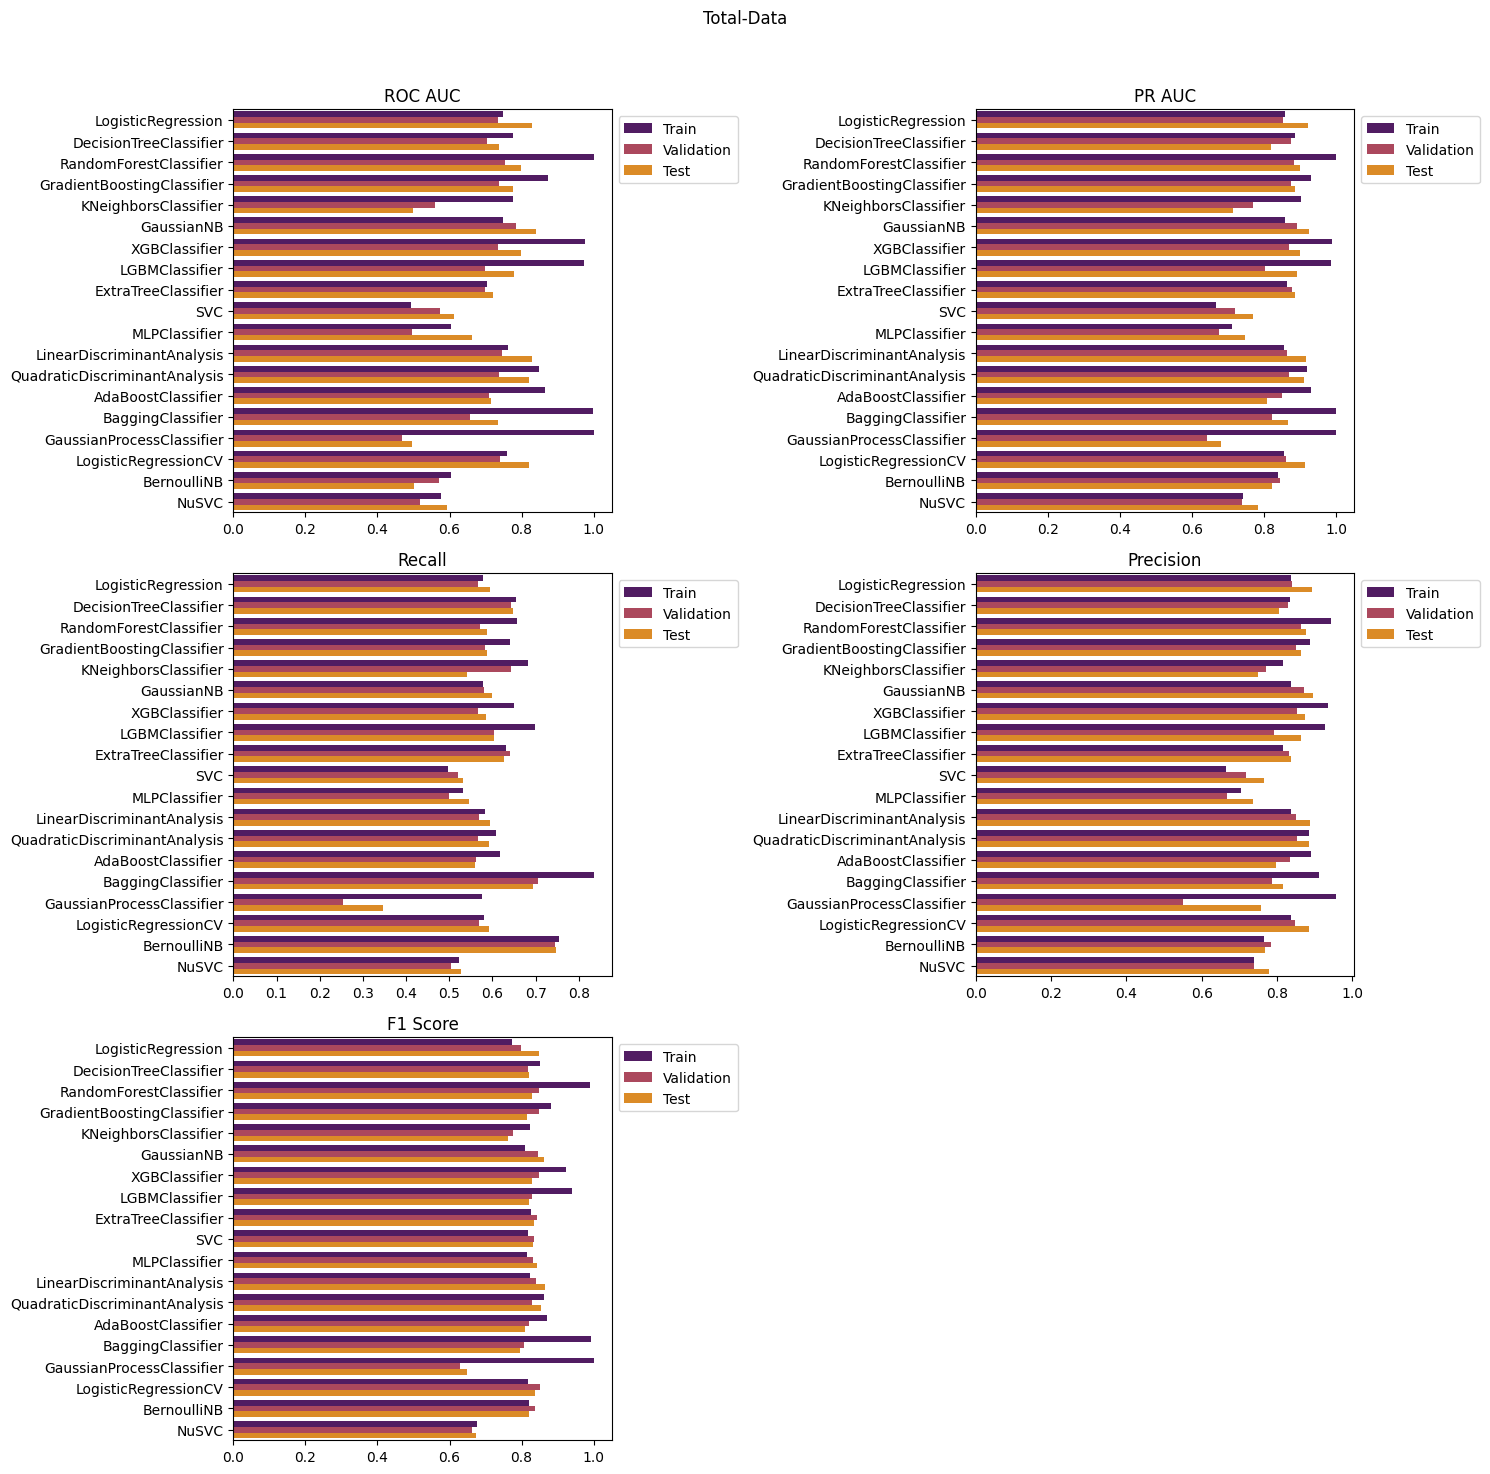

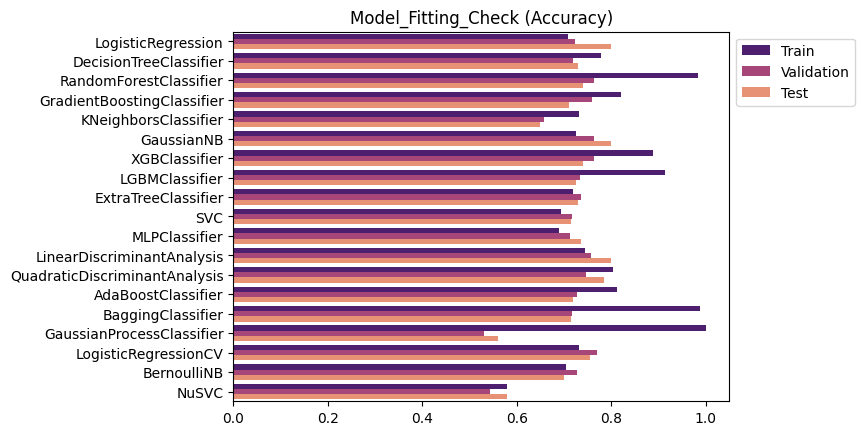

In [411]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.barplot(data=combined_bar.melt(id_vars=['Model', 'Dataset'], value_vars=['ROC_AUC_train', 'ROC_AUC_val', 'ROC_AUC_test']),
            x='value', y='Model', hue='Dataset', palette='inferno', ax=axes[0, 0])
axes[0, 0].set_title('ROC AUC')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')
axes[0, 0].legend(loc='upper left', bbox_to_anchor=(1, 1))


sns.barplot(data=combined_bar.melt(id_vars=['Model', 'Dataset'], value_vars=['PR_AUC_train', 'PR_AUC_val', 'PR_AUC_test']),
            x='value', y='Model', hue='Dataset', palette='inferno', ax=axes[0, 1])
axes[0, 1].set_title('PR AUC')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))


sns.barplot(data=combined_bar.melt(id_vars=['Model', 'Dataset'], value_vars=['Recall_train', 'Recall_val', 'Recall_test']),
            x='value', y='Model', hue='Dataset', palette='inferno', ax=axes[1, 0])
axes[1, 0].set_title('Recall')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')
axes[1, 0].legend(loc='upper left', bbox_to_anchor=(1, 1))


sns.barplot(data=combined_bar.melt(id_vars=['Model', 'Dataset'], value_vars=['Precision_train', 'Precision_val', 'Precision_test']),
            x='value', y='Model', hue='Dataset', palette='inferno', ax=axes[1, 1])
axes[1, 1].set_title('Precision')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')
axes[1, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))


sns.barplot(data=combined_bar.melt(id_vars=['Model', 'Dataset'], value_vars=['F1-score_train', 'F1-score_val', 'F1-score_test']),
            x='value', y='Model', hue='Dataset', palette='inferno', ax=axes[2, 0])
axes[2, 0].set_title('F1 Score')
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylabel('')
axes[2, 0].legend(loc='upper left', bbox_to_anchor=(1, 1))


fig.delaxes(axes[2, 1])  

fig.suptitle('Total-Data')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

sns.barplot(data=combined_bar.melt(id_vars=['Model','Dataset'], value_vars=['Accuracy_train','Accuracy_val','Accuracy_test']),
            x = 'value', y='Model', hue='Dataset',palette='magma')
plt.title('Model_Fitting_Check (Accuracy)')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.show()

- 분류 모델 활용하여 대출심사

In [21]:
X = credit.drop('Creditability', axis=1, inplace=False)
y = credit.Creditability
    
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=0.625, random_state=42)

In [22]:
Tree = model[1]

In [23]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
y_predict = Tree.predict(X_test)

In [25]:
coef = pd.Series(data=np.round(Tree.feature_importances_, 2), index=X.columns)
print(coef.index)


Index(['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount($)',
       'Length of current employment(Month)', 'Sex & Marital Status',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Type of apartment', 'No of Credits at this Bank',
       'Occupation', 'No of dependents', 'Telephone', 'Foreign Worker'],
      dtype='object')


In [40]:
def credit() : 
    print('대출심사 - - 조건에 해당하는 정보를 입력해주십시오.')
    print('**** 아래 보기를 확인하여 작성해주세요 ****\n')
    Account_Balance = int(input('은행잔고 : [1: No account 2 : None (No balance) 3 : Some Balance]'))
    Duration_of_Credit_month = int(input('대출기간 : [Free ex) 12, 24, 36, 48]'))
    Payment_Status_of_Previous_Credit = int(input('대출납입상태 : [0 : Delayed 1 : Other Credits 2 : Paid Up 3 : No Problem with Current Credits 4 : Previous Credits Paid]'))
    Purpose = int(input('대출목적 : [1 : New Car 2 : Used Car 3 : Furniture 4 : TV 5 : Appliances 6 : Repair 8 : Vacation 9 :Retraining 10 : Business 0 : Other]'))
    Credit_Amount = int(input('대출액 : [Free]'))
    Length_of_current_employment = int(input('현 직업 근무 기간 : [1: Unemployed 2: <1 Year 3: [1, 4) 4: [4, 7) 5: Above 7]'))
    Sex_Marital_Status = int(input('성별 : [1: Male, Divorced 2: Male, Single 3: Male, Married/Widowed  4: Female]'))
    Duration_in_Current_address = int(input('현 거주지 거주기간 : [1: <1 Year 2: [1, 4) 3: [4, 7) 4: Above 7]'))
    Most_valuable_available_asset = int(input('가장 가치있는 자산 : [1: None 2: Car 3: Life Insurance 4: Real Estate]'))
    Age = int(input('나이 : [Free]'))
    Type_of_apartment = int(input('주거환경 : [1: free apartment 2: Rented 3: Owned]'))
    No_of_Credits_at_this_Bank = int(input('대출 건수 : [1 : one 2 : 2~3 3 : 4~5 4 : 6 ~]'))
    Occupation = int(input('직업 : [1: Unemployed, unskilled 2: Unskilled Permanent Resident 3: Skilled 4: Executive]'))
    No_of_dependents = int(input('부양 가족 수 : [Free]'))
    Telephone = int(input('전화기 소유 여부 : [1: No 2: Yes]'))
    Foreign_Worker = int(input('외국인 근로자 여부 : [1: No 2: Yes]'))

    credit_classifier = Tree.predict([[Account_Balance,Duration_of_Credit_month,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Length_of_current_employment,Sex_Marital_Status,Duration_in_Current_address,Most_valuable_available_asset,Age,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker]])

    print('-은행잔고 :',Account_Balance)
    print('-대출기간 :',Duration_of_Credit_month)
    print('-대출 납입 상태 :',Payment_Status_of_Previous_Credit)
    print('-대출목적 :',Purpose)
    print('대출액 :' ,Credit_Amount)
    print('-현 직업 근무기간 :',Length_of_current_employment)
    print('-성별 :',Sex_Marital_Status)
    print('-현 거주지 거주기간 :',Duration_in_Current_address)
    print('-가장 가치있는 자산 :',Most_valuable_available_asset)
    print('나이 :',Age)
    print('-주거환경 :',Type_of_apartment)
    print('-대출건수 :',No_of_Credits_at_this_Bank)
    print('-직업 :',Occupation)
    print('부양 가족 수 :',No_of_dependents)
    print('핸드폰 소지 여부 :',Telephone)
    print('외국인 근로자 여부 :',Foreign_Worker)

    if credit_classifier == 1 : 
        print('\n대출조건이 적합합니다. \n은행에 방문해주세요.')
    else : 
        print('\n다음기회에')

In [39]:
credit()

대출심사 - - 조건에 해당하는 정보를 입력해주십시오.
**** 아래 보기를 확인하여 작성해주세요 ****



ValueError: invalid literal for int() with base 10: ''